In [1]:
import seaborn as sns
sns.set_style("whitegrid")
from scipy.stats import norm
import pickle
from process_model import *
from fit_process import *
#from process_model_2stage import CHASETwoStageProcessModel
#from process_model_baseline import CHASEBaselineProcessModel
#from process_model_ref import *

def expected_value(options):
    values = options[:,:,0]
    weights = options[:,:,1]

    # expected value of each outcome
    v = np.array([np.multiply(weights[i], values[i]) for i in range(len(options))])

    return np.sum(v, 1)


def evar(options):

    values = options[:,:,0]
    weights = options[:,:,1]

    # expected value of each outcome
    v = np.array([np.multiply(weights[i], values[i]) for i in range(len(options))])

    # expected variance of each option
    evar = np.array([np.dot(weights[i], values[i] ** 2) - np.sum(v[i]) ** 2 for i in range(len(options))])

    return evar

def max_ev(options):
    ev = expected_value(options)
    if ev[0] > ev[1]:
        return [1, 0]
    else:
        return [0, 1]


def max_var(options):
    v = evar(options)
    if v[0] > v[1]:
        return [1, 0]
    else:
        return [0, 1]
    
def cv(options):
    ev = expected_value(options)
    sd = np.sqrt(evar(options))    
    return sd / ev


def max_cv(options):
    v = cv(options)
    if v[0] > v[1]:
        return [1, 0]
    else:
        return [0, 1]
    
def pfix(p):
    c = 1e-5
    return np.min([np.max([p, c]), 1 - c])

P_STOP_GEOM = {}
P_SWITCH = {}

# Load data

In [3]:
from mypy.explib.frey2014 import frey2014
data = pd.read_csv('paper/data/frey2015/frey_data.csv', index_col=0)
problems = {gid: np.array(frey2014.get_options(gid)) for gid in data.problem.unique()}
#trialdata = frey2014.sampledata_by_subject()

In [4]:
for pid in problems:
    for i in range(2):
        problems[pid][i][:,1] = problems[pid][i][:,1]/problems[pid][i][:,1].sum()

# Group level

In [11]:
N_ITER = 1
OUTDIR = 'process_fitresults_frey2015'

FIXED = {'pref_units': 'sums', 'max_T': 1000, 'N': 10000}

PARSETS = [#['theta', 'tau'],
           #['theta', 'tau', 'pow_gain'],
           #['theta', 'tau', 'prelec_gamma', 'prelec_elevation'],
           ['theta', 'tau', 'pow_gain', 'prelec_gamma', 'prelec_elevation'],
           ]
m = CHASEProcessModel(problems=problems,
                      startdist='laplace')

In [12]:
for i, group in enumerate(['young', 'old']):
    
    SIM_ID = 'process_frey2015_%s' % group
    grpdata = data[data.group==i]
    print SIM_ID
    
    for fitting in PARSETS:

        results = fit_mlh(m, problems, grpdata, 
                          SIM_ID, FIXED, fitting, ftol=.1, niter=N_ITER, outdir=OUTDIR)

process_frey2015_young
pow_gain	prelec_elevation	prelec_gamma	tau	theta


/Users/markant/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/markant/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/markant/code/chase/chase/cpt.py:40: RuntimeWarning: divide by zero encountered in log
  f = np.exp(-delta * ((-np.log(p)) ** gamma))
/Users/markant/code/chase/chase/cpt.py:114: VisibleDeprecationWarning: using a non-integer n

[  1.691   1.301   1.855  99.578  49.865] 18765.3236503
[  0.339   1.235   2.254  61.478  17.034] 15743.3543841
[  0.993   1.923   2.762  47.296   3.396] 26311.3868369
[  1.884   0.582   0.595  30.773  19.021] 24957.8469078
[  1.753   1.699   1.134  66.486  28.969] 24048.101621
[  0.44    0.25    0.762  64.068  36.896] 14710.4704032
[ 1.055  2.271  1.615  6.472  5.487] 22313.1891559
[  0.861   1.253   2.074  66.938  24.622] 15921.32092
[  1.234   0.542   1.438  26.206  16.55 ] 23831.4058883
[  1.109   1.966   2.144  50.806  30.035] 17430.0148961
[  0.827   0.223   2.558   1.44   30.117] 15678.3931695
[  0.842   1.129   1.277   0.903  37.539] 15139.0234828
[  0.257   1.832   1.921  97.446  35.805] 18336.8823264
[  0.196   2.949   0.083  43.24   34.655] 24138.2994972
[  1.524   2.52    0.787   6.779  31.31 ] 14971.236897
[  1.033   1.345   2.596  10.51   33.433] 16906.9279956
[  1.492   1.102   2.911  57.184  36.692] 19083.3999854
[  1.611   2.891   1.844  16.933  28.389] 19513.0505911
[

process_model.py:332: RuntimeWarning: invalid value encountered in divide
  p_stop_B_f = np.bincount(ss_B, minlength=max_T)


[  0.106   2.99    2.453  63.196  16.147] 16709.3331549
[  0.97    0.441   1.609  81.662  29.151] 17282.5963139
[  0.688   1.258   1.402  22.195  32.91 ] 16151.4529562
[  0.676   1.901   1.912  47.332  37.419] 17684.2060184
[  0.145   0.074   0.478  45.777   7.942] 15305.8990449
[  0.307   0.647   2.745  18.439   8.514] 14553.7911403
[ 0.154  1.468  2.441  7.765  3.709] 16707.8396819
[  1.166   0.125   1.382  90.814  21.344] 21132.7442733
[  0.718   1.234   1.442  15.748  16.002] 14870.3596141
[  0.691   0.51    1.687  57.246  29.002] 14245.0605545
[  0.647   2.263   2.316  71.061  47.02 ] 18353.6592939
differential_evolution step 2: f(x)= 14245.1
[  0.441   0.51    2.175  21.718  29.002] 15637.964019
[  1.033   1.32    2.254  61.743  27.329] 16508.6183317
[  0.39    0.225   2.405  27.031  22.723] 14516.3344307
[  0.738   0.573   1.28   89.248  31.972] 14227.6046857
[  0.668   0.823   0.743  86.546  14.318] 15299.183017
[  0.515   0.12    2.387  64.068  36.896] 14451.6130466
[  0.607  

In [13]:
fitting = PARSETS[0]

best = {}
pred = {}

for i, group in enumerate(['young', 'old']):
    grpdata = data[data.group==i]
    SIM_ID = 'process_frey2015_%s' % group
    
    best[group] = best_result(SIM_ID, FIXED, fitting, outdir=OUTDIR)
    pred[group] = predict_from_result(m, problems, grpdata, SIM_ID, FIXED, 
                                      fitting = fitting,
                                      outdir=OUTDIR)
    print best[group]

/Users/markant/code/chase/chase/cpt.py:40: RuntimeWarning: divide by zero encountered in log
  f = np.exp(-delta * ((-np.log(p)) ** gamma))


index                                                               0
Unnamed: 0                                                          0
iteration                                                           0
success                                                          True
nllh                                                          14200.7
k                                                                   5
N                                                                2883
bic                                                           28441.3
pow_gain                                                     0.521263
prelec_elevation                                             0.443852
prelec_gamma                                                   1.4549
tau                                                           30.2877
theta                                                         20.4877
sim_id              process_frey2015_young(pow_gain,prelec_elevati...
Name: 0, dtype: obje

In [14]:
cp = {}
bf_cp = {}
quant = {}
bf_quant = {}

In [15]:
for i, group in enumerate(['young', 'old']):
    cp[group] = data[data.group==i].groupby('problem').apply(lambda d: np.mean(d.choice))
    bf_cp[group] = pred[group]['cp']

    quant[group] = mquantiles(data[data.group==i].samplesize)
    bf_quant[group] = pred[group][['ss(.25)', 'ss(.5)', 'ss(.75)']].mean()

In [16]:
from chase.cpt import w_prelec
from mypy.viz import tableau20
cols = [tableau20[0], tableau20[2], tableau20[4], tableau20[6]]
cols = ['black', 'black', 'black', 'black']

/Users/markant/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


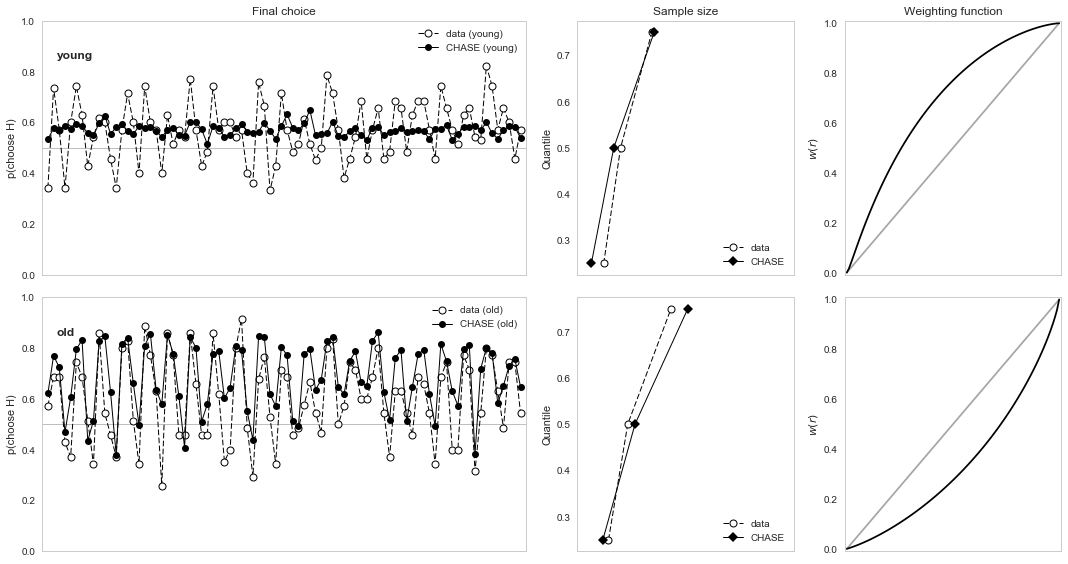

In [17]:
n_prob = len(problems)

fig = plt.subplots(2, 4, figsize=(15, 8), sharex=True)

for j, group in enumerate(['young', 'old']):


    # choice probs
    axi = plt.subplot2grid((2,4), (j,0), colspan=2)
    axi.text(0.03, .85, group, fontsize=12, fontweight='semibold', transform=axi.transAxes)
    axi.plot([0, n_prob+1], [.5, .5], '-', color='gray', alpha=.5, linewidth=1)
    axi.plot(range(1, n_prob+1), cp[group], '--o', label=('data (%s)' % group), color='black', linewidth=1,
             markeredgecolor='black', markerfacecolor='white', markeredgewidth=1)
    axi.plot(range(1, n_prob+1), bf_cp[group], '-o', color=cols[0], label=('CHASE (%s)' % group), linewidth=1)
    axi.set_ylim(0, 1)
    axi.set_xlim(0, n_prob+1)
    
    if j == 3:
        axi.set_xticks(range(1,n_prob+1))
        #axi.set_xticklabels([problems_str[i] for i in range(9)], rotation=90)
        #axi.set_xlabel('Problem')
    else:
        axi.set_xticks([])
    axi.set_ylabel('p(choose H)')
    axi.grid(None)
    
    if j == 0: axi.set_title('Final choice')
    axi.legend(loc='upper right')

    # sample size
    axi = plt.subplot2grid((2,4), (j,2))
    axi.plot(quant[group], [.25, .5, .75], '--o', color=cols[0], label='data', linewidth=1,
             markeredgecolor='black', markerfacecolor='white', markeredgewidth=1)
    axi.plot(bf_quant[group], [.25, .5, .75], '-D', color=cols[0], label='CHASE', linewidth=1)

    if j == 0: axi.set_title('Sample size')
    axi.set_xlim(0, 90)
    #axi.legend(loc='upper left')
    if j == 3:
        axi.set_xlabel('Sample size')
    else:
        axi.set_xticks([])
    axi.set_ylabel('Quantile')
    

    axi.legend(loc='lower right')
    axi.grid(None)




    p = np.arange(0, 1.01, .01)


    axi = plt.subplot2grid((2,4), (j,3))
    axi.plot([0, 1], [0, 1], color='gray', alpha=.7)


    delta = best[group]['prelec_elevation']
    gamma = best[group]['prelec_gamma']
    axi.plot(p, w_prelec(p, delta, gamma), '-', color=cols[0])

    if j == 0: axi.set_title('Weighting function')
    axi.set_ylabel(r'$w(r)$')
    if j==3:
        axi.set_xlabel('r')
    else:
        axi.set_xticks([])
    axi.legend()
    axi.set_xlim(-.01,1.01)
    axi.set_ylim(-.01,1.01)
    axi.grid(None)



plt.tight_layout()
plt.show()
#fig[0].savefig('%s/fitresults_frey2015_bygroup.pdf' % FIGDEST, bbox_inches='tight')

# Individual level

In [ ]:
N_ITER = 1
OUTDIR = 'process_fitresults_frey2015_individual'

FIXED = {'pref_units': 'sums', 'max_T': 1000, 'N': 10000}

PARSETS = [#['theta', 'tau'],
           #['theta', 'tau', 'pow_gain'],
           #['theta', 'tau', 'prelec_gamma', 'prelec_elevation'],
           ['theta', 'tau', 'pow_gain', 'prelec_gamma', 'prelec_elevation'],
           ]
m = CHASEProcessModel(problems=problems,
                      startdist='laplace')

In [4]:
sid = 134
sdata = []
for td in trialdata[sid]:
    sdata.append({'group': 0, 
                  'probid': td['gid'],
                  'sampled_option': td['sampledata'],
                  'outcomes': td['outcomes'],
                  'choice': td['choice'],
                  'samplesize': len(td['sampledata'])})

### Baseline model

In [5]:
name = 'process_baseline_frey_sid=%s' % sid, 
outdir = '%s_fitresults' % name
fixed = {}
fitting = ['p_stop_geom']

In [6]:
r = fit_mlh(CHASEBaselineProcessModel(), problems, sdata, name,
            fixed=fixed, fitting=fitting, outdir=outdir, niter=1)

p_stop_geom
[ 0.5] 849.94715144 0.066055059433
[ 0.525] 868.522399009 0.059131860733
[ 0.475] 827.790545409 0.0574309825897
[ 0.45] 803.942073499 0.0568459033966
[ 0.4] 752.535148585 0.0578598976135
[ 0.35] 689.693199559 0.0621709823608
[ 0.25] 552.85496584 0.0607831478119
[ 0.15] 431.619872046 0.0605990886688
[ 0.25] 552.85496584 0.0591399669647
[ 0.05] 377.419142854 0.0589969158173
[ 0.1] 390.4013101 0.0573070049286
[ 0.075] 378.48215518 0.0577259063721
[ 0.025] 401.433790428 0.0573968887329
[ 0.062] 376.119048173 0.0572850704193
[ 0.075] 378.48215518 0.0575721263885
[ 0.056] 376.218468728 0.0574719905853
[ 0.069] 376.922390464 0.0575468540192
[ 0.059] 376.04498535 0.0567419528961
[ 0.056] 376.218468728 0.0575449466705
[ 0.061] 376.052571181 0.0573921203613
[ 0.058] 376.099225487 0.0599269866943
[ 0.06] 376.041238829 0.0574100017548
[ 0.061] 376.052571181 0.0568299293518
[ 0.06] 376.04120421 0.0583980083466
[ 0.059] 376.04498535 0.0586450099945
[ 0.06] 376.040747463 0.0605261325836
[

In [7]:
r = best_result(name, fixed=fixed, fitting=fitting, outdir=outdir)
print r

process_baseline_frey_sid=134(p_stop_geom|)
index                                                    0
Unnamed: 0                                               0
iteration                                                0
success                                               True
nllh                                              376.0407
k                                                        1
N                                                       84
bic                                               756.5123
p_stop_geom                                     0.05996094
sim_id         process_baseline_frey_sid=134(p_stop_geom|)
Name: 0, dtype: object


In [8]:
P_STOP_GEOM[sid] = int(r['p_stop_geom']*1000)/1000.

### Geom + two-stage

In [9]:
name = 'process_2stage_frey_sid=%s' % sid
outdir = '%s_fitresults' % name
fixed = {'p_stop_geom': P_STOP_GEOM[sid]}
fitting = ['pow_gain', 'pow_loss', 'prelec_elevation', 'prelec_gamma', 's']

In [10]:
r = fit_mlh(CHASETwoStageProcessModel(), problems, sdata, name,
            fixed=fixed, fitting=fitting, niter=1, outdir=outdir)

pow_gain	pow_loss	prelec_elevation	prelec_gamma	s
[ 0.8  1.   1.   1.   0.1] 369.731117434 0.354986190796
[ 0.84  1.    1.    1.    0.1 ] 369.079689021 0.310471057892
[ 0.8   1.05  1.    1.    0.1 ] 369.731117434 0.309674024582
[ 0.8   1.    1.05  1.    0.1 ] 369.767724834 0.30826997757
[ 0.8   1.    1.    1.05  0.1 ] 369.612127134 0.301007986069
[ 0.8    1.     1.     1.     0.105] 369.44865507 0.306087970734
[ 0.816  1.02   0.95   1.02   0.102] 369.275167976 0.309600114822
[ 0.822  0.958  0.98   1.028  0.103] 369.118464473 0.308259010315
[ 0.831  0.991  0.972  1.039  0.104] 368.862126749 0.305466890335
[ 0.847  0.987  0.958  1.059  0.106] 368.398231146 0.309979915619
[ 0.85   0.986  0.955  0.993  0.106] 368.505984403 0.319510936737
[ 0.87   0.98   0.937  1.04   0.102] 368.279841079 0.306465148926
[ 0.905  0.97   0.906  1.06   0.1  ] 367.655607277 0.317300081253
[ 0.89   0.94   0.97   1.036  0.104] 367.792688406 0.308568954468
[ 0.911  0.995  0.936  1.031  0.104] 367.409510669 0.30535

cpt.py:155: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  weights[gaindf.iloc[i]['id']] = gaindf.iloc[i]['w']
cpt.py:158: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  weights[lossdf.iloc[i]['id']] = lossdf.iloc[i]['w']


In [11]:
best = best_result(name, fixed=fixed, fitting=fitting, outdir=outdir)
print best

process_2stage_frey_sid=134(pow_gain,pow_loss,prelec_elevation,prelec_gamma,s|p_stop_geom=0.059)
index                                                               0
Unnamed: 0                                                          0
iteration                                                           0
success                                                          True
nllh                                                         352.1212
k                                                                   5
N                                                                  84
bic                                                          726.3966
pow_gain                                                    0.9991847
pow_loss                                                 9.122015e-08
prelec_elevation                                             1.479758
prelec_gamma                                                0.8886748
s                                                           0.6

In [12]:
pred, supp = predict(CHASETwoStageProcessModel(), problems, sdata,
               fixed, fitting, best)

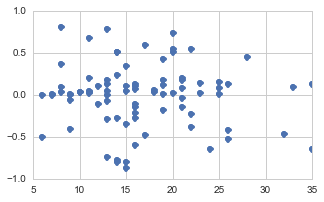

In [13]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(pred.samplesize.values, pred.choice.values - pred.cp.values, 'o')
ax.set_ylim(-1, 1)
plt.show()

### CHASE + geom

In [27]:
name = 'process_chase+geom_sid=%s' % sid
outdir = '%s_fitresults' % name
fixed = {'p_stop_geom': P_STOP_GEOM[sid],
         'p_fixed': 1}
fitting = ['s', 'pow_gain', 'pow_loss']
m = CHASEProcessModel(problems=problems, startdist='indifferent')

In [28]:
r = fit_mlh(m, problems, sdata, name,
            fixed=fixed, fitting=fitting, ftol=.1, niter=1, outdir=outdir)

pow_gain	pow_loss	s
[]


NameError: global name 'dummy' is not defined

process_chase+geom_sid=134(pow_gain,pow_loss,s|p_fixed=1,p_stop_geom=0.059)
index                                                         0
Unnamed: 0                                                    0
iteration                                                     0
success                                                    True
nllh                                                   359.2837
k                                                             3
N                                                            84
bic                                                    731.8598
pow_gain                                              0.8447503
pow_loss                                               1.523698
s                                                    0.03820132
sim_id        process_chase+geom_sid=134(pow_gain,pow_loss,s...
Name: 0, dtype: object


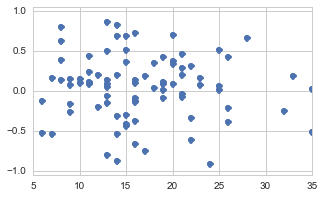

In [24]:
best = best_result(name, fixed=fixed, fitting=fitting, outdir=outdir)
print best
pred, supp = predict(m, problems, sdata,
                     fixed, fitting, best)
pref = {pid: supp[pid]['pref'] for pid in supp}
threshold = {pid: supp[pid]['threshold'] for pid in supp}
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(pred.samplesize.values, pred.choice.values - pred.cp.values, 'o')
ax.set_ylim(-1.05, 1.05)
plt.show()

In [17]:
n = 0
for i, row in pred.iterrows():
    if row['choice']==0 and row['cp'] < .5:
        n += 1
    elif row['choice']==1 and row['cp'] > .5:
        n += 1
print n, pred.shape[0], n/float(pred.shape[0])

63 84 0.75


In [ ]:
# good examples: S8G3, S3G4

1
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[ 0 12  0  0  4  4  4  4 18  0  1  1 18  1 18 18  0 18]
[  0.          -8.52653979  -8.52653979  -8.52653979 -11.83225188
 -15.13796397 -18.44367606 -21.74938815 -11.79332283 -14.47962235
 -16.42188718 -18.24520071  -8.38776466 -10.3074907   -0.29182545
   9.6854419    7.17122238  17.13569897]


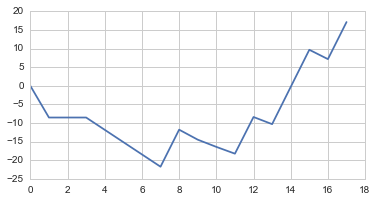

0
[1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[ 0 18  0 18  2 18 18  2  0  5  0 13  5 13  0  2  2 18  0 18  2  0 18  2]
[  0.          12.09617628  12.09617628  24.19235256  26.01051429
  38.10669057  50.20286685  52.02102859  52.02102859  54.35636737
  60.24327816  56.92903685  58.98093628  55.68440024  61.67164206
  58.71370604  55.63116937  63.95663479  59.59837547  68.00848194
  64.86544057  60.63427733  69.0728158   65.9749514 ]


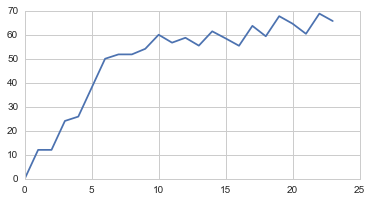

0
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 0]
[ 0 13  0 13  3 13  0 18  1  1  0 18 18 18 13]
[  0.          -9.13596576  -9.13596576 -18.27193152 -20.8512668
 -29.98723256 -29.98723256 -21.68183632 -25.05204027 -28.32027044
 -32.46829426 -24.12526208 -15.74144841  -7.24753553  -8.77379361]


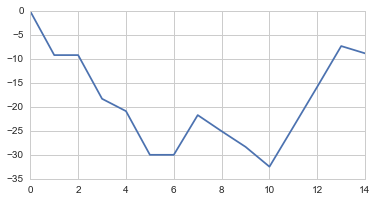

1
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
[ 4  4  0  4  0  4  4  4  4  2  2  2  2 24  2  0  0  2  2  2]
[ -3.30571209  -6.61142418  -6.61142418  -9.91713627  -9.91713627
 -13.22284836 -16.52856045 -19.83427254 -23.13998463 -24.12179196
 -25.14359886 -26.21631428 -27.22357588 -13.45337514 -14.40609188
 -17.00438159 -19.58614273 -20.52795051 -21.44430402 -22.5097468 ]


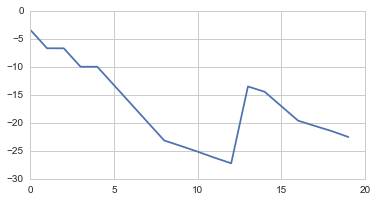

0
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
[ 0  0 11  0  0  8  0  0  0  1  0  0  0  1  1]
[  0.           0.          -7.91008089  -7.91008089  -7.91008089
 -13.92040011 -13.92040011 -13.92040011 -15.75284927 -16.61378856
 -18.31397714 -20.06003747 -21.76813613 -22.64406205 -23.5522187 ]


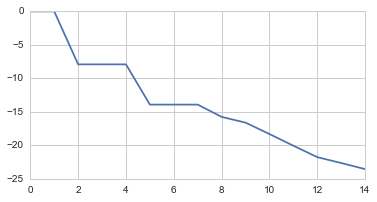

0
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
[ 5  5 13  5  0  5  5  0 18  1 18  0  0  1 18  1  0  5  5  5  5  5  5  0  5
  5]
[ -4.00726466  -8.01452932 -17.15049508 -21.15775974 -21.15775974
 -25.1650244  -29.17228906 -29.17228906 -19.92334897 -22.84463316
 -13.70460086 -17.3770945  -20.83353975 -23.75132782 -14.54124885
 -17.61861814 -21.22973185 -20.76634844 -20.1417385  -19.57180614
 -18.86955366 -18.39372857 -17.72917365 -13.39524313 -12.83793872
 -12.12764014]


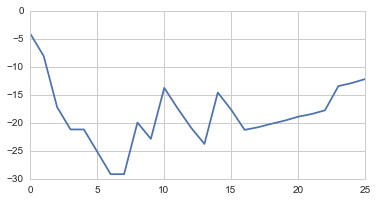

1
[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 2  0  2  2  0 24  2  2  0  0 12  0  0  0  9 12 12  0  0  9  0  9]
[  1.81816173   1.81816173   3.63632347   5.4544852    5.4544852
  20.95711357  22.7752753   24.59343704  27.91919854  30.94782762
  25.22975418  28.53752708  31.6554391   34.78531393  31.04655567
  25.27175258  19.7353761   22.71204281  25.72612659  22.02809852
  25.09672716  21.77000008]


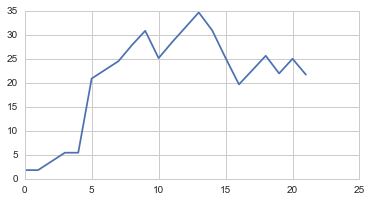

0
[1 1 1 1 1 1 1 1 0 0 0 0 0 0]
[ 3  0  3  3  3  0  3  3  0  8 11  0  0 11]
[  2.57933527   2.57933527   5.15867054   7.73800582  10.31734109
  10.31734109  12.89667636  15.47601163  17.3898784   12.89386843
   6.41050855   8.35274801  10.33109817   3.82874067]


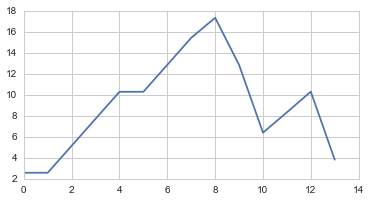

0
[0 0 0 0 0 0 0 1 1 1 1 1]
[6 6 6 0 6 6 0 1 0 1 0 0]
[ -4.68964869  -9.37929738 -14.06894607 -14.06894607 -18.75859476
 -23.44824345 -23.44824345 -26.08351759 -29.38971992 -32.0900885
 -35.47132521 -38.81035507]


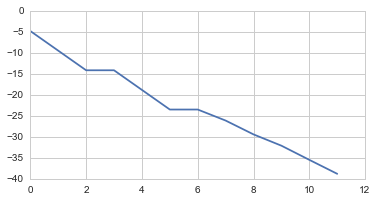

0
[1 1 1 1 0 0]
[1 1 1 1 3 0]
[ 1.          2.          3.          4.          2.18183827  3.18183827]


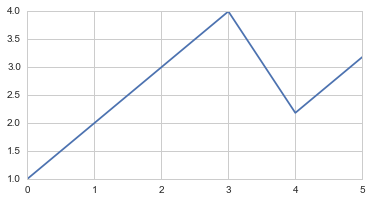

0
[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[ 0 18 18  0  2  0  0  0  0  2  0 11 11  0  0 11 11  8  0  0  0  8]
[  0.          12.09617628  24.19235256  24.19235256  26.01051429
  26.01051429  26.01051429  26.01051429  26.01051429  27.82867603
  27.82867603  22.35020229  16.99880422  19.37704352  21.88344252
  16.72098619  11.39109282   7.98662349  10.45554676  12.90510121
  15.28389676  12.19298453]


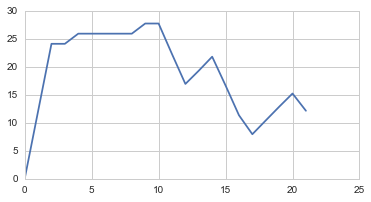

1
[1 1 1 1 0 0 0 0 0 0]
[24  0 24  2  4 12  4  4  0  4]
[ 15.50262837  15.50262837  31.00525674  32.82341847  37.89917383
  38.22175181  43.86216133  48.84027831  56.91847558  62.03069023]


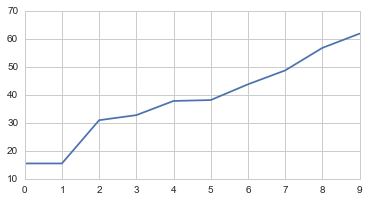

0
[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
[24  0  2  2  2  2  2  5  5  5  5  5  5  5  5  5]
[ 15.50262837  15.50262837  17.3207901   19.13895184  20.95711357
  22.7752753   24.59343704  23.85334729  22.90731035  22.30637926
  21.78839823  21.3485641   20.53026238  19.9612651   19.5085796
  18.78088694]


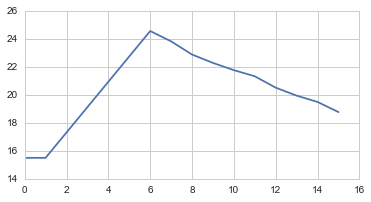

1
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ 4  4  2  4  4  4 18  4  4  0  0  0 18  0  2  0 18 18  2 18 18 18  0  2  2
 18  0  2]
[ -3.30571209  -6.61142418  -8.42958591 -11.735298   -15.04101009
 -18.34672218 -30.44289846 -33.74861055 -37.05432264 -41.13982412
 -45.3662427  -49.50272975 -40.84350608 -45.18136043 -47.79795959
 -51.8499216  -43.09779006 -34.32453403 -36.99206047 -28.18410151
 -19.24976479 -10.35891011 -14.53393862 -17.16508307 -19.92378028
 -11.08564452 -15.33816482 -18.09498758]


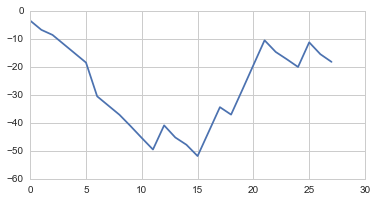

0
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
[ 0  0  1  1 18  0  1 18  0  0  4  0  0  4  4  4  4]
[  0.           0.           1.           2.          14.09617628
  14.09617628  15.09617628  27.19235256  27.19235256  27.19235256
  26.62580947  29.54258355  32.33429968  32.16054987  31.72372725
  31.2564269   30.75801273]


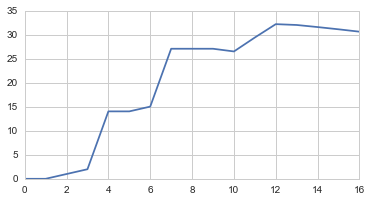

1
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
[ 3  3  3 13  3  3  3  1 23  1  1 18 18  1 23  1  1  1 18]
[ -2.57933527  -5.15867054  -7.73800582 -16.87397158 -19.45330685
 -22.03264212 -24.61197739 -27.30222828 -14.89586717 -17.8142029
 -20.61849621 -11.21908166  -1.79435186  -4.47118599   7.94709714
   5.17634572   2.36534403  -0.45907441   9.04160117]


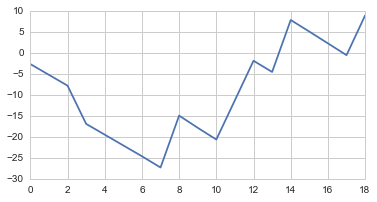

0
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
[ 0  2  0  2  0 12  0  2  0  6  0  0  0  0 23  0  6  0  0  0 12 12]
[  0.          -1.81816173  -1.81816173  -3.63632347  -3.63632347
 -12.16286326 -12.16286326 -13.98102499 -15.96344635 -13.08265685
 -14.7942353  -16.56129894 -18.3410897  -20.03448653  -6.36462915
  -8.05871561  -5.14686945  -6.93054725  -8.72864499  -6.49091144
 -12.92695024 -19.21236201]


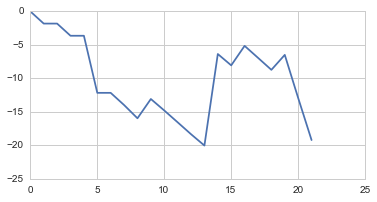

1
[1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[ 1 18  1  1  1  4  4  0  4 12  4 12  1 18 18  1 23  1  1  1]
[  1.          13.09617628  14.09617628  15.09617628  16.09617628
  16.05441235  15.88946534  18.99773883  18.85742844  13.55549158
  13.46445441   8.21291646   4.58915447  13.09518937  21.68370081
  17.87290364  29.45002704  25.91102138  22.40057388  18.9938506 ]


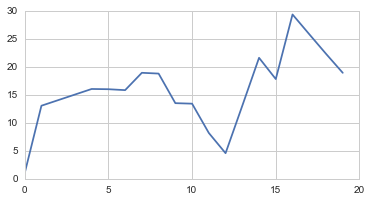

0
[0 0 0 0 0 1 1 1 1]
[ 5  5  5 13 13  1  0 18 18]
[ -4.00726466  -8.01452932 -12.02179398 -21.15775974 -30.2937255
 -35.5050397  -41.51249779 -34.46904208 -27.53328909]


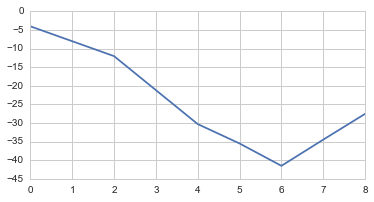

1
[1 1 1 1 0 0 0 1]
[ 0  3 24 24  0  5  5  3]
[  0.           2.57933527  18.08196364  33.58459201  41.78697047
  46.28292341  50.76718722  50.49254694]


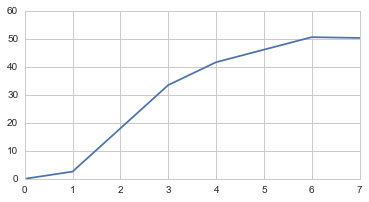

1
[1 1 1 0 0 0 0 0 1 1 1]
[ 1 18 18  0 13  3  0  0  1 18  1]
[  1.          13.09617628  25.19235256  33.40486714  33.21330731
  39.67218357  48.20648727  56.69640625  55.20571666  65.21566317
  63.66999059]


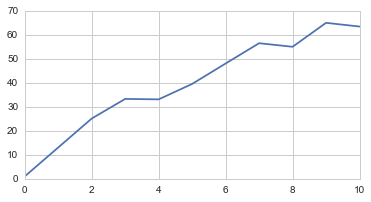

0
[0 0 0 0 0 0 1 1 1 1 1 1 1]
[ 0  1 23  1 23 23  6  0  6 12  6  0 12]
[  0.          -1.         -15.94389332 -16.94389332 -31.88778663
 -46.83167995 -50.35850349 -58.55593527 -61.87074247 -61.74478393
 -64.82148156 -72.61348432 -72.21590943]


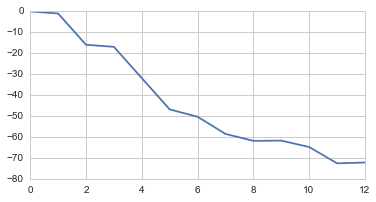

1
[1 1 1 1 1 1 1 1 0 0 0 0 0]
[ 8  8 11  8  0 11 11  0 23  1  1  1  1]
[  6.01031922  12.02063845  19.93071934  25.94103856  25.94103856
  33.85111945  41.76120034  41.76120034  30.99847595  35.3365769
  39.94947201  44.31628925  48.68594853]


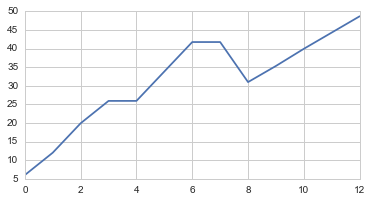

1
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
[ 2  2  2  0  0  0 24  2  2  0  6  6  0  6  6]
[ -1.81816173  -3.63632347  -5.4544852   -5.4544852   -5.4544852
  -5.4544852  -20.95711357 -22.7752753  -24.59343704 -27.34072585
 -25.37895168 -23.17351517 -25.81228558 -23.62381349 -21.51391336]


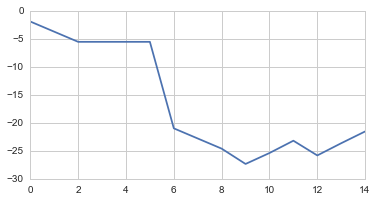

0
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[24  2  2  2  2  2  2  2 24  8  8  0  0  0 11  0  0  0 11]
[-15.50262837 -17.3207901  -19.13895184 -20.95711357 -22.7752753
 -24.59343704 -26.41159877 -28.2297605  -43.73238887 -41.88510354
 -40.53757441 -45.44842561 -50.50980593 -55.29749692 -52.38650436
 -57.11945749 -62.15346888 -66.99589774 -63.84807113]


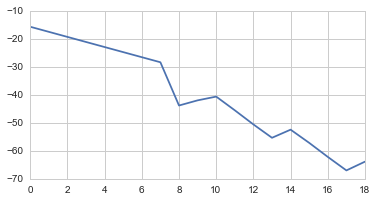

1
[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
[ 0  6 12  6 12  6 12  0 23  1  1  1  1  1  1  1]
[  0.           4.68964869  13.21618848  17.90583717  26.43237696
  31.12202565  39.64856544  39.64856544  28.68383942  32.78200568
  36.89563423  41.0594844   45.09292222  49.34867157  53.35214029
  57.48918573]


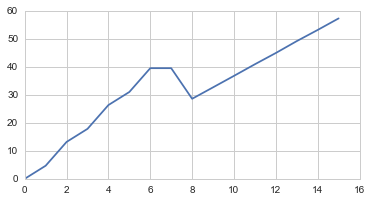

1
[1 1 1 1 1 1 0 0 0 0 0]
[ 6  6 12 12 12 12  1  1 23  1  1]
[  4.68964869   9.37929738  17.90583717  26.43237696  34.95891676
  43.48545655  50.01394049  56.75707933  47.61795332  54.11911755
  60.69443529]


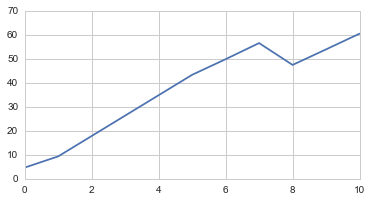

1
[1 1 1 1 1 1 1 0 0 0 0 0 0 0]
[11  0  0 11  0  8  8  1  1  0  1 23  0  1]
[  7.91008089   7.91008089   7.91008089  15.82016178  15.82016178
  21.83048101  27.84080023  31.16813082  34.3038539   38.32336105
  41.43422657  29.73106084  33.59302199  36.76802086]


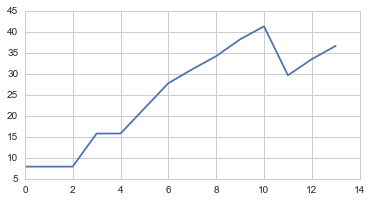

1
[1 1 1 1 1 0 0 0 0]
[13  7  7 13 13  1  1  0  1]
[  9.13596576  14.49245965  19.84895353  28.98491929  38.12088505
  45.04360436  52.07759352  59.72822683  66.65478303]


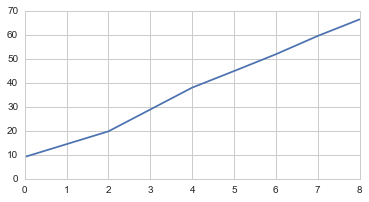

1
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[ 1  1 18  0  0 18 18  1  3 13  3 13 13  3 13 13]
[ -1.          -2.         -14.09617628 -14.09617628 -14.09617628
 -26.19235256 -38.28852884 -39.28852884 -41.76194389 -37.79697693
 -40.39647689 -36.16620762 -31.9915584  -34.3730432  -30.36281643
 -26.61397128]


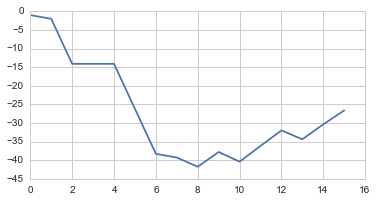

0
[1 1 1 1 1 0 0]
[ 5 13  5  5  0 18 18]
[  4.00726466  13.14323042  17.15049508  21.15775974  21.15775974
  12.46358101   3.69285014]


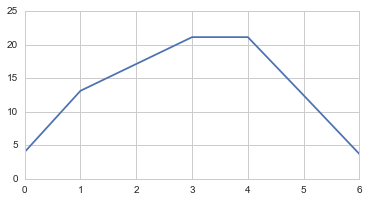

1
[1 1 1 1 1 1 1 0 0 0 0 0 0]
[ 9  9  0  0  9  9 12  1  1  0  1  1  1]
[  6.65297045  13.30594089  13.30594089  13.30594089  19.95891134
  26.61188178  35.13842158  39.46059455  43.79239992  48.78974101
  53.02366907  57.25307529  61.60925598]


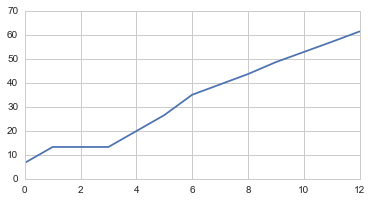

1
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ 1  0  1  1  1  1 12  6  6  0  6 12  6  6  6  6  6 12  6 12]
[ -1.          -1.          -2.          -3.          -4.          -5.
   3.01426245   7.12320233  11.24920181  10.42020181  14.55302513
  22.5623559   26.69586161  30.81503725  34.94035435  39.07317767
  43.19644761  51.20146317  55.32268597  63.34249654]


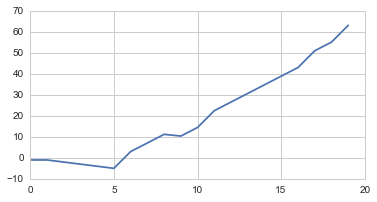

1
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[ 0  2  2 24  2 24  5  0 13 13  5  5  5 13]
[  0.          -1.81816173  -3.63632347 -19.13895184 -20.95711357
 -36.45974194 -39.03051342 -45.18417284 -42.236549   -39.54438317
 -41.82340154 -44.22301549 -46.81760749 -44.07074221]


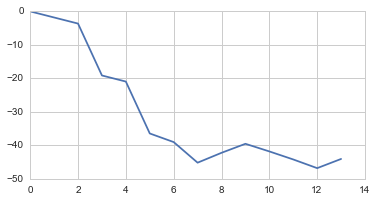

1
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
[ 4  4  4  4  2 18  4  4  4  4 18  2  4  4  4  1 23  1  1]
[  3.30571209   6.61142418   9.91713627  13.22284836  15.04101009
  27.13718637  30.44289846  33.74861055  37.05432264  40.36003473
  52.45621101  54.27437274  57.58008483  60.88579692  64.19150901
  67.86899998  56.18939377  59.80745478  63.34243955]


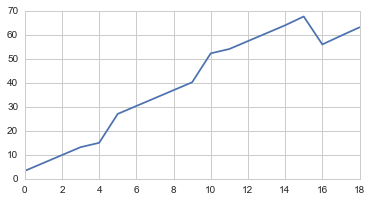

1
[1 1 1 1 1 1 1 1 1 1]
[ 7  7  7  0 13  7  7  0  7  7]
[  5.35649388  10.71298777  16.06948165  16.06948165  25.20544741
  30.5619413   35.91843518  35.91843518  41.27492907  46.63142295]


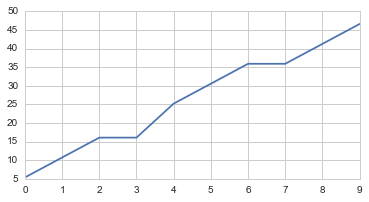

1
[0 0 0 0 0 1 1 1 1 1 1 1 1]
[23  1  0 23  1 18  5  5  5  5  1  1  5]
[-14.94389332 -15.94389332 -15.94389332 -30.88778663 -31.88778663
 -26.76820396 -29.18889772 -31.8406198  -34.5133562  -37.02365508
 -42.30150512 -47.90299128 -50.51970028]


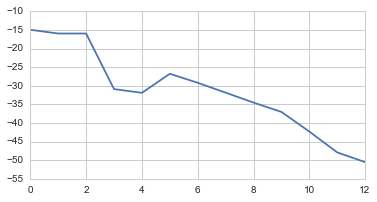

1
[0 0 0 0 0 1 1 1]
[23  1  1  1 23  0 12  6]
[-14.94389332 -15.94389332 -16.94389332 -17.94389332 -32.88778663
 -39.15857831 -37.48164116 -39.52779404]


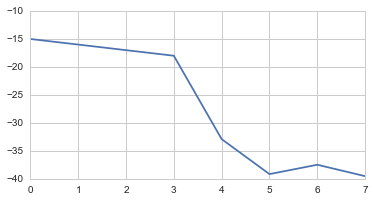

1
[1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1]
[ 6  6  6  6  6  6  6  0  0  1 18  0  6  6  6  6]
[  4.68964869   9.37929738  14.06894607  18.75859476  23.44824345
  28.13789214  32.82754083  37.51718952  42.20683821  46.21410287
  37.68756308  42.37721177  44.5439635   46.5213434   48.56437275
  50.39066461]


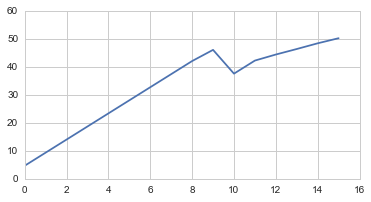

1
[1 1 1 1 0 0 0 0 0 0 0 1]
[12  0  6  6  0  0  0  0 18  2  0  6]
[  8.52653979   8.52653979  13.21618848  17.90583717  22.33795721
  26.99219522  31.32370334  35.80527918  27.27158309  30.36026034
  34.70796878  37.44687403]


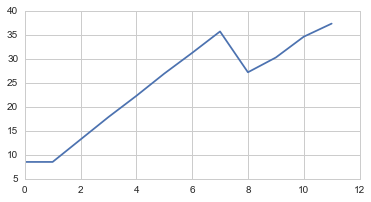

1
[1 1 1 0 0 0 0]
[12 12  4  1  1  1  1]
[  8.52653979  17.05307958  20.35879167  26.49906502  32.51673122
  38.73696575  44.94653879]


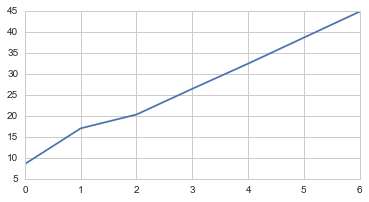

1
[1 1 1 1 1 0 0 0 0]
[7 7 7 7 7 1 1 1 1]
[  5.35649388  10.71298777  16.06948165  21.42597554  26.78246942
  31.47211811  36.1617668   40.85141549  45.54106418]


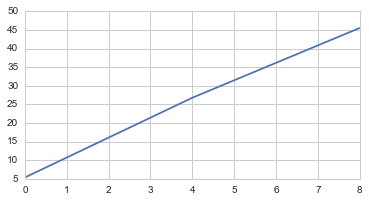

1
[1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0]
[  0   0   0   0   0 -18 -18   0   0  -5 -13  -5  -5   0   0   0 -18 -13
   0  -5   0   0 -13  -5 -13   0   0   0   0   0   0 -13 -13]
[  0.           0.           0.           0.           0.         -12.09617628
 -24.19235256 -24.19235256 -24.19235256 -22.84002045 -16.79271383
 -15.75581925 -14.70578143  -9.30863877  -4.06022845   1.12150876
  -6.73228172  -1.00041264  -3.75834083  -2.90545147  -5.71176437
  -8.5543658   -2.37562688  -1.56216721   4.37999356   9.01749044
  13.74730394  18.57825602  23.01652605  27.65337997  25.70589559
  32.6995148   39.48284231]


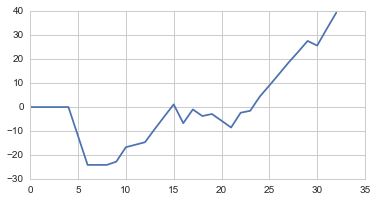

0
[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
[-23  -1  -1  -1  -1   0  -6  -6   0  -6  -6 -12   0  -6 -12]
[-14.94389332 -15.94389332 -16.94389332 -17.94389332 -18.94389332
 -18.94389332 -17.4234727  -16.05366449 -19.50617254 -18.06762739
 -16.69167772 -11.33212016 -14.48180645 -13.11131585  -7.75915579]


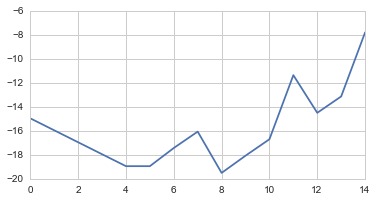

0
[1 1 1 1 1 1 0 0 0 0 0 0 0]
[ -1  -1 -23  -1  -1 -23  -7  -7   0   0  -7  -7  -7]
[ -1.          -2.         -16.94389332 -17.94389332 -18.94389332
 -33.88778663 -34.47681276 -35.00336936 -40.78612476 -46.19239505
 -46.75018641 -46.88630849 -47.16298699]


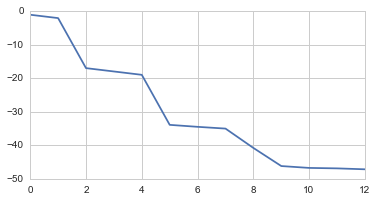

1
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[-24  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -5  -5  -5  -5
  -1  -5 -18 -18  -5  -5 -18]
[-15.50262837 -17.3207901  -19.13895184 -20.95711357 -22.7752753
 -24.59343704 -26.41159877 -28.2297605  -30.04792224 -31.86608397
 -33.6842457  -35.50240744 -37.32056917 -39.13873091 -37.68811306
 -36.39002459 -34.8021303  -33.24474189 -35.37419725 -33.74054414
 -23.9060284  -14.13398219 -12.80538784 -11.27850531  -1.44398956]


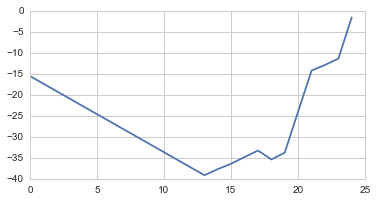

1
[1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[ -1   0   0 -23  -1  -1  -1  -1  -1  -2  -4  -4  -4  -2  -2 -18  -2  -4
  -2  -4 -18]
[ -1.          -1.          -1.         -15.94389332 -16.94389332
 -17.94389332 -18.94389332 -19.94389332 -20.94389332 -21.46530551
 -20.60445787 -19.71237797 -18.49925902 -18.87242    -19.37819784
  -9.10176975  -9.51619594  -8.23189694  -8.57387849  -7.3447812
   2.29526198]


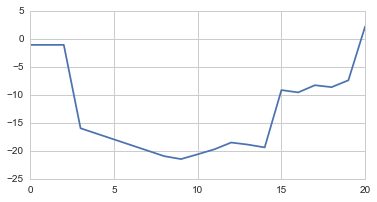

1
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
[  0 -13 -13 -13  -5 -13  -5 -13 -13   0   0   0  -1  -1  -1   0   0   0]
[  0.           9.13596576  18.27193152  27.40789729  31.41516194
  40.55112771  44.55839237  53.69435813  62.83032389  62.83032389
  62.83032389  62.83032389  67.22351825  71.71601385  75.96814035
  81.28820307  86.42458952  91.70810839]


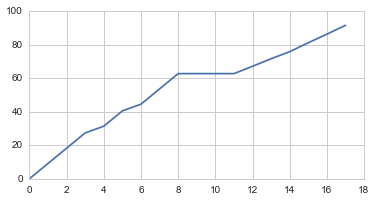

1
[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
[ -1  -1   0  -1   0  -1 -23 -18  -3  -3  -3  -3  -3  -3 -18  -1  -1  -1
  -1  -1  -1]
[ -1.          -2.          -2.          -3.          -3.          -4.
 -18.94389332  -9.662215    -9.88823645 -10.02935442 -10.01068805
  -9.98973816 -10.10970171 -10.23042644  -0.800326     3.24795185
   7.42227975  11.76144232  16.0521241   20.45915977  24.65287998]


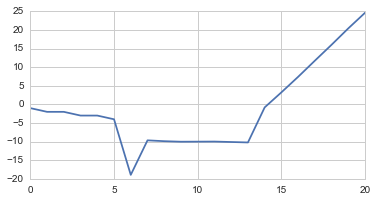

0
[0 0 0 0 0 0 0 0 0 1 1 1 1 1]
[  0   0  -8  -8  -8 -11  -8 -11 -11  -2 -24  -2  -2   0]
[  0.           0.           6.01031922  12.02063845  18.03095767
  25.94103856  31.95135778  39.86143868  47.77151957  51.56783927
  40.0428717   43.90168834  47.82300191  53.33510221]


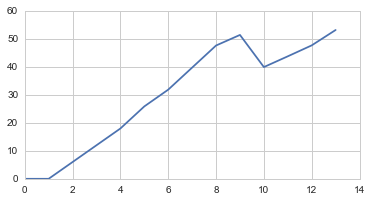

0
[0 0 0 0 0 0 0 1 1 1 1 1 1]
[-13   0  -5   0  -5  -5 -13  -1  -1   0 -23  -1  -1]
[  9.13596576   9.13596576  13.14323042  13.14323042  17.15049508
  21.15775974  30.2937255   34.33802738  37.85901482  42.0534996
  30.37793565  33.9066194   37.70360662]


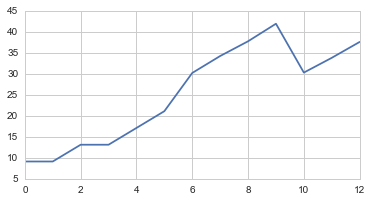

0
[1 1 1 0 0 0]
[-23 -23  -1   0   0 -13]
[-14.94389332 -29.88778663 -30.88778663 -40.99314897 -51.25189413
 -52.94016154]


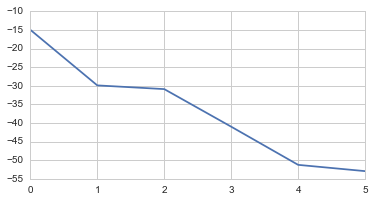

1
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ -5  -5  -5 -13 -13  -5   0   0  -1 -23  -1  -1  -1 -23  -1  -1  -1  -1
   0  -1  -1  -1  -1  -1  -1   0  -1  -1  -1   0  -1   0 -23 -23  -1]
[   4.00726466    8.01452932   12.02179398   21.15775974   30.2937255
   34.30099016   34.30099016   39.07877119   43.36553013   32.15452882
   36.39117958   40.62287938   44.81518252   33.58247696   37.84275638
   42.04469158   46.29296897   50.50195523   55.51646394   59.67636265
   64.04197373   68.44606636   72.60962554   76.70429331   81.03071878
   86.07456425   90.30599418   94.56315287   98.8209568   103.65658899
  107.75895308  112.7473398   101.50228148   90.54299471   94.80106852]


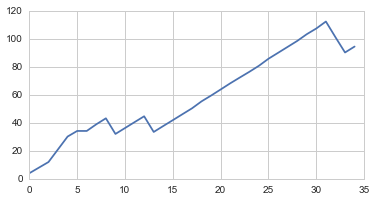

0
[1 1 1 1 1 1 0 0 0 0 0 0 0 0]
[-18   0   0 -18   0   0  -7   0  -7  -7  -7  -7  -7  -7]
[-12.09617628 -12.09617628 -12.09617628 -24.19235256 -24.19235256
 -24.19235256 -23.17402863 -27.25044003 -26.05965063 -25.1474593
 -24.14240194 -22.92507938 -21.97308833 -21.14049644]


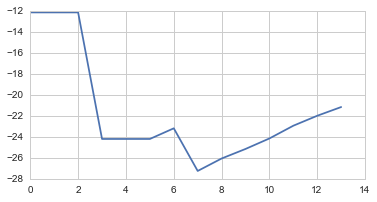

1
[0 0 0 0 0 1 1 1 1 1 1]
[ -6 -12   0   0   0   0  -2 -24  -2  -2  -2]
[  4.68964869  13.21618848  13.21618848  13.21618848  13.21618848
  15.77970319  16.82020378   3.28052833   4.06950181   5.16128697
   5.92752331]


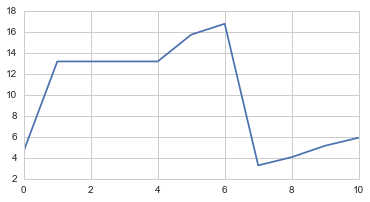

0
[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
[  0   0  -1  -1   0 -23   0   0  -6  -6  -6   0  -6   0  -6   0]
[  0.           0.          -1.          -2.          -2.         -16.94389332
 -16.94389332 -19.22748723 -17.18440291 -14.89502039 -12.86507461
 -15.23621967 -13.25999837 -15.73575069 -13.31605405 -15.82075026]


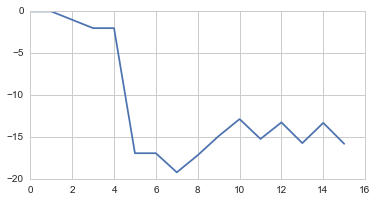

1
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ -5  -5  -5 -13   0  -2  -2   0  -2   0   0   0  -2  -2  -2  -2  -2   0
  -2 -24  -2  -2   0]
[  4.00726466   8.01452932  12.02179398  21.15775974  21.15775974
  23.7090589   26.32899324  30.65751203  33.50918471  37.79908124
  41.87885055  46.03876516  48.9356148   51.75343651  54.67600664
  57.44358938  59.96170207  64.07801525  67.00311637  54.74559756
  57.5364968   60.43934169  64.64124287]


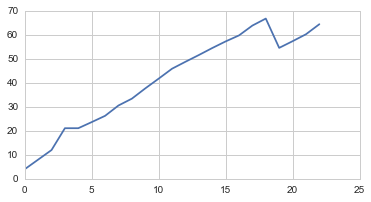

1
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
[ -6   0   0 -12 -12   0 -12   0  -2 -24  -2  -2  -2  -2  -2  -2  -2 -24
 -24  -2]
[  4.68964869   4.68964869   4.68964869  13.21618848  21.74272827
  21.74272827  30.26926807  30.26926807  32.50957708  20.01066472
  22.26291416  24.43720759  26.44703394  28.81255755  31.1256987
  33.29258079  35.36389362  22.90991789  10.38618126  12.62987564]


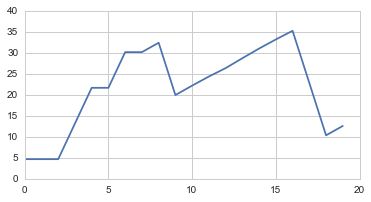

1
[1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[-18   0  -1 -18  -6  -6 -12 -12   0  -6   0   0   0   0   0   0 -18   0
   0  -1  -1   0   0 -18  -1 -18]
[-12.09617628 -12.09617628 -13.09617628 -25.19235256 -27.1123132
 -29.43173993 -27.65974105 -26.27559739 -32.541397   -34.3444591
 -28.9756983  -23.84738509 -18.85890548 -13.63850585  -8.37973627
  -3.22243345 -11.07696236  -5.89237337  -0.73165952   3.99698161
   8.42098607  13.41500809  18.58126435  10.60653214  15.27051931
   7.43097538]


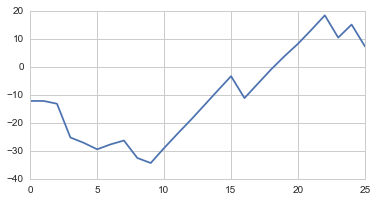

1
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ -7   0   0 -13  -7  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   0   0
  -1   0  -1   0 -23  -1  -1]
[  5.35649388   5.35649388   5.35649388  14.49245965  19.84895353
  22.98434102  26.10451233  29.1804937   32.4630103   35.58965951
  38.94614155  42.28740741  45.595994    48.8168576   51.7562874
  54.99845096  58.81418111  62.92827098  66.11512806  70.10947188
  73.21998527  77.29312639  65.50020305  68.84663305  72.03706427]


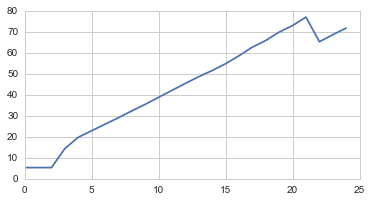

1
[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
[ -4 -18  -4   0 -18   0 -18 -18 -18   0   0   0   0   0 -18  -1 -18  -1
  -4  -4 -18]
[  3.30571209  15.40188837  18.70760046  24.74714691  18.29994731
  24.62957908  18.40637584  12.15395569   5.72623403  12.17014184
  18.36791664  24.36351078  30.86895183  37.11946942  30.60409702
  36.25706662  29.76117216  35.17289721  32.91482571  31.34666972
  38.56444069]


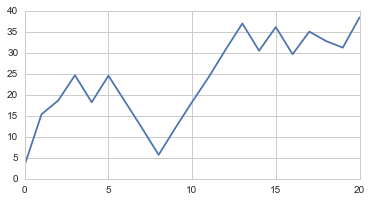

1
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ -6  -6  -6 -12 -12  -6   0   0 -22   0   0   0   0   0   0   0   0   0
   0   0   0   0 -22   0   0]
[   4.68964869    9.37929738   14.06894607   22.59548586   31.12202565
   35.81167434   41.76366021   47.82691591   38.04273292   43.95251298
   50.04646381   56.09053506   62.05786849   67.96764855   74.00404602
   80.03660659   86.13823121   92.10940152   98.10359319  104.09011107
  110.08813963  115.92118186  106.20619454  112.23108133  118.18690409]


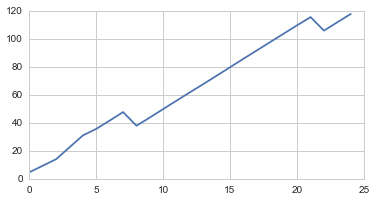

1
[1 1 1 1 0 0 0 0 1 1 1 1 1 1]
[-23  -1  -1  -1 -12   0  -6   0   0   0  -1  -1 -23  -1]
[-14.94389332 -15.94389332 -16.94389332 -17.94389332 -14.099594
 -18.69711848 -18.49264176 -22.86706395 -19.43725114 -16.07906065
 -13.51614569 -11.10639603 -23.44746226 -20.92526938]


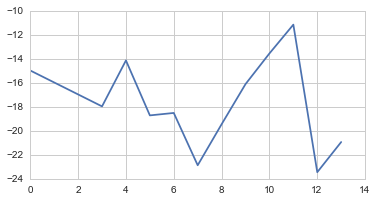

1
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[  0   0 -18  -1   0 -18  -1 -18   0  -5  -5   0  -5  -5 -13  -5  -5]
[  0.           0.          12.09617628  13.09617628  13.09617628
  25.19235256  26.19235256  38.28852884  38.28852884  38.77287178
  39.37672064  43.56026646  44.26472283  44.69228353  40.11234703
  40.77667215  41.21756236]


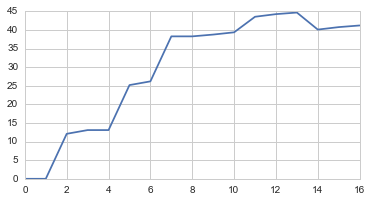

1
[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
[-11  -8   0   0   0  -8  -2 -24  -2  -2  -2  -2 -18 -18 -24]
[ -7.91008089 -13.92040011 -13.92040011 -13.92040011 -13.92040011
 -19.93071934 -21.60446389  -8.60135798 -10.3329452  -12.26009609
 -13.85171049 -15.5535594   -6.21355657   3.05505988  15.90479302]


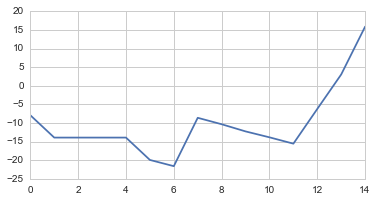

1
[1 1 1 1 1 1 0 0 0 0 0 0 0]
[ -4   0  -4  -4 -12   0 -24  -2  -2  -2 -24  -2  -2]
[ -3.30571209  -3.30571209  -6.61142418  -9.91713627 -18.44367606
 -18.44367606  -5.29363091  -6.81217038  -8.38533395 -10.02944545
   3.19098696   1.54692829   0.13224858]


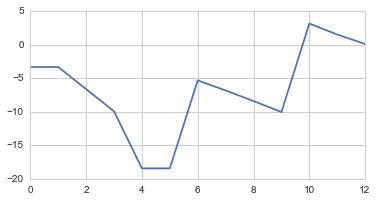

0
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
[ -4  -4   0  -4 -12  -4  -4  -4  -4  -4  -4 -12  -4  -4 -18   0   0  -1
   0   0   0]
[ -3.30571209  -6.61142418  -6.61142418  -9.91713627 -18.44367606
 -21.74938815 -25.05510024 -28.36081233 -31.66652442 -34.97223651
 -38.2779486  -46.80448839 -50.11020048 -53.41591257 -44.30939428
 -48.15830413 -51.99643078 -55.11606737 -58.94897319 -62.75262776
 -66.50617212]


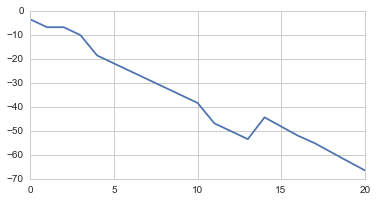

0
[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[-12   0  -4  -4 -12  -4  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3]
[ -8.52653979  -8.52653979 -11.83225188 -15.13796397 -23.66450376
 -26.97021585 -29.2179768  -31.54317552 -33.77247186 -36.05074301
 -38.33921062 -40.60336254 -43.03520167 -45.26415455 -47.76476709
 -50.15044468]


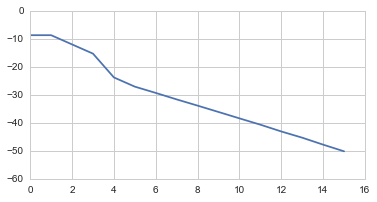

0
[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
[-13   0  -3  -3  -3 -13 -13   0  -2  -2  -2  -2   0   0  -2   0]
[ -9.13596576  -9.13596576 -11.71530103 -14.29463631 -16.87397158
 -26.00993734 -35.1459031  -35.1459031  -38.08637925 -40.78573502
 -43.7715724  -46.72104432 -51.16254137 -55.30469772 -58.38318431
 -62.83306913]


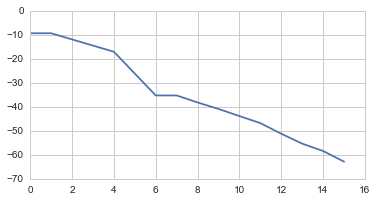

0
[1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
[-18  -5  -5  -5  -5  -1  -5  -5  -5 -24  -2   0   0  -2   0   0]
[-12.09617628 -16.10344094 -20.1107056  -24.11797026 -28.12523492
 -29.12523492 -33.13249958 -37.13976424 -41.1470289  -29.08823139
 -32.01206791 -36.60071471 -41.26610186 -44.24954657 -48.7089794
 -53.28238125]


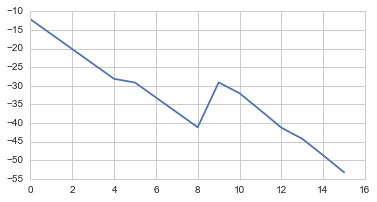

1
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[-18 -18 -18 -18 -18   0  -1   0 -18  -1 -18  -4  -4 -12 -12  -4  -4 -12
  -4]
[  12.09617628   24.19235256   36.28852884   48.38470512   60.4808814
   60.4808814    61.4808814    61.4808814    73.57705768   74.57705768
   86.67323396   91.5533773    96.6074297    96.44183641   96.53316939
  101.9133088   107.16230509  107.11997271  112.46391367]


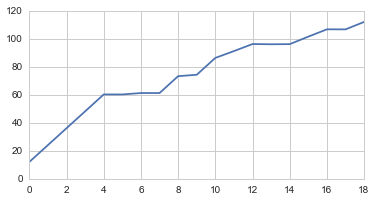

0
[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[-13  -3 -13 -13  -3 -13  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1 -23 -23
  -1 -23  -1]
[  -9.13596576  -11.71530103  -20.8512668   -29.98723256  -32.56656783
  -41.70253359  -48.00189187  -54.38845906  -60.74148436  -66.98046723
  -73.23286686  -79.3309738   -85.75108288  -92.03031602  -98.29613241
 -104.5284069   -95.28734103  -86.10588523  -92.42536865  -83.1306537
  -89.43672035]


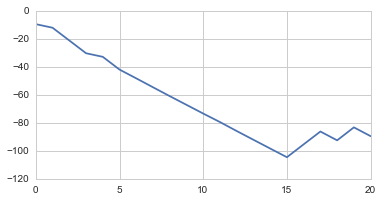

0
[1 1 1 1 1 0 0 0 0]
[ -5  -5  -5  -5 -18  -2  -2  -2  -2]
[ -4.00726466  -8.01452932 -12.02179398 -16.02905864 -28.12523492
 -32.4326884  -36.72344509 -40.79714345 -45.05450655]


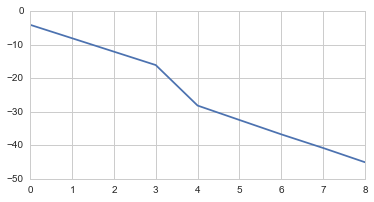

1
[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
[  0  -5  -5 -13  -5  -5  -5  -1  -1 -23  -1 -18  -1 -23 -18]
[  0.          -4.00726466  -8.01452932 -17.15049508 -21.15775974
 -25.1650244  -29.17228906 -32.65924073 -36.1606699  -24.38001133
 -27.90506915 -19.22142441 -22.67549074 -10.89579406  -1.95213404]


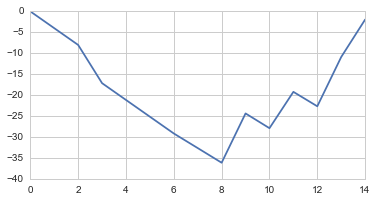

1
[1 1 1 1 0 0 0 0]
[ -4 -12  -4  -4  -3  -3 -24  -3]
[ -3.30571209 -11.83225188 -15.13796397 -18.44367606 -20.92475432
 -23.29277316 -11.3487192  -13.71673805]


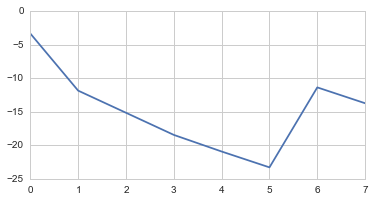

1
[1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1]
[  0   0   0   0 -12  -2   0 -18   0 -18   0  -2  -2   0  -2 -12 -12 -12
   0]
[  0.           0.           0.           0.          -8.52653979
 -10.34470153 -10.34470153   0.52875917  -0.8651424   10.08549304
  18.09316174  24.61081478  31.70203306  39.54035529  46.15997548
  46.48828197  46.75050752  47.0920302   55.3537186 ]


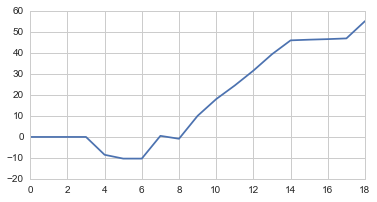

0
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0 -11   0   0   0   0   0   0   0  -8   0 -11   0   0   0  -1   0
   0   0  -1   0  -1   0  -1   0 -18  -1  -1  -1 -18 -18 -18   0   0]
[  0.           0.          -7.91008089  -7.91008089  -7.91008089
  -7.91008089  -7.91008089  -7.91008089  -7.91008089  -7.91008089
 -13.92040011 -13.92040011 -21.83048101 -21.83048101 -23.22732076
 -24.79531587 -25.58700612 -27.24550061 -28.89131884 -30.48083339
 -31.10045005 -32.64157102 -33.32168643 -34.84001026 -35.63033956
 -37.08728251 -26.23187157 -26.89484687 -27.60617634 -28.1735801
 -17.37309055  -6.64771527   4.2076695    2.70644352   1.15996786]


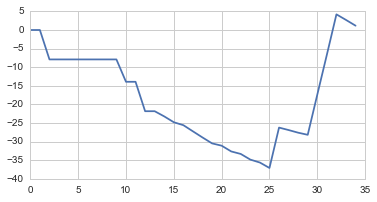

0
[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[-11   0 -11  -8  -8   0   0  -8  -1  -1  -1 -23  -1  -1  -1 -23  -1  -1
  -1  -1  -1  -1 -23 -23  -1  -1]
[ -7.91008089  -7.91008089 -15.82016178 -21.83048101 -27.84080023
 -27.84080023 -27.84080023 -33.85111945 -37.36063487 -40.845637
 -44.43585748 -32.83839219 -36.30511738 -39.77945603 -43.23210728
 -31.62953038 -35.14790006 -38.75582906 -42.17147817 -45.76476483
 -49.09335238 -52.60378049 -41.03840197 -29.38711658 -32.76655608
 -36.27891355]


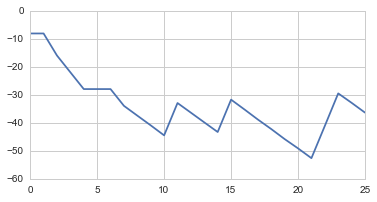

0
[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
[  0  -5   0  -5  -5  -5   0  -3  -3  -3  -3  -3  -3   0  -3  -3  -3  -3
  -3  -3  -3  -3  -3  -3  -3   0  -3  -3  -5   0  -5 -13]
[  0.          -4.00726466  -4.00726466  -8.01452932 -12.02179398
 -16.02905864 -16.02905864 -16.08822157 -15.93630464 -15.83276019
 -15.79078069 -15.70482622 -15.49574183 -17.72378098 -17.70818646
 -17.77174689 -17.7165749  -17.69658289 -17.69857836 -17.66099635
 -17.61461936 -17.50227991 -17.28879802 -17.277601   -17.34116143
 -19.58522964 -19.4509027  -19.32537076 -21.36025368 -19.06722463
 -21.08678383 -28.56690069]


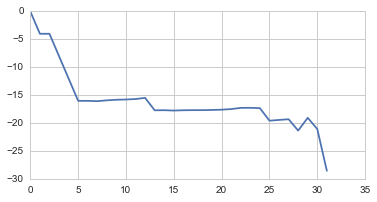

1
[0 0 0 0 0 0 1 1 1 1 1]
[-24  -2   0   0 -24  -2   0   0   0   0  -7]
[ 15.50262837  17.3207901   17.3207901   17.3207901   32.82341847
  34.64158021  40.69763794  46.69244947  52.76850698  58.37671015
  59.62330853]


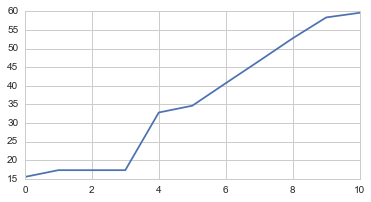

1
[1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[ -4  -4  -4 -12  -4 -12 -12  -1 -18 -18 -18  -1 -23  -4   0 -12   0   0
  -4  -4  -4 -12  -4]
[ -3.30571209  -6.61142418  -9.91713627 -18.44367606 -21.74938815
 -30.27592794 -38.80246773 -43.6953466  -36.10738622 -28.54467245
 -20.75473912 -25.49302636 -14.91537315  -9.21536057  -0.2441774
   0.99532806   9.89168571  18.57466299  24.8289994   31.06985794
  37.17108519  38.31329524  44.63744731]


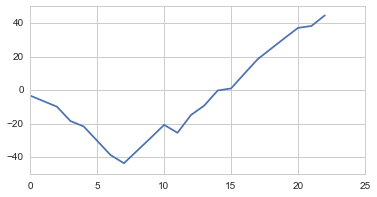

1
[0 0 0 1 1 1 1 1 1 1 0 0 0]
[-18  -1 -18  -4  -4  -4 -12   0  -4 -12 -18 -18 -18]
[ 12.09617628  13.09617628  25.19235256  31.07569453  37.10685618
  42.81774184  43.24868193  51.48338887  57.19427453  57.99060678
  66.71310555  75.24406494  83.95780472]


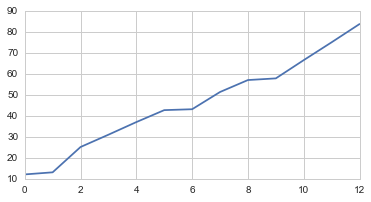

1
[0 0 0 1 1 1 1 1 1 1 1]
[ -1 -18  -1  -5  -5   0  -5   0   0  -5  -5]
[  1.          13.09617628  14.09617628  14.92110124  15.70870116
  20.57017051  21.24579533  25.95191821  30.65804108  31.34610758
  32.33277435]


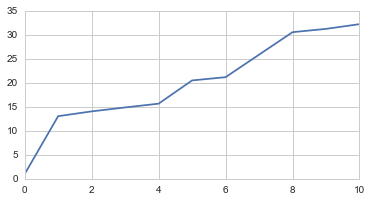

1
[1 1 1 0 0 0 1 1]
[ -2   0  -2  -1  -1 -23 -12   0]
[ -1.81816173  -1.81816173  -3.63632347  -4.00032347  -4.37832347
   9.83143734   7.4900534   13.0775943 ]


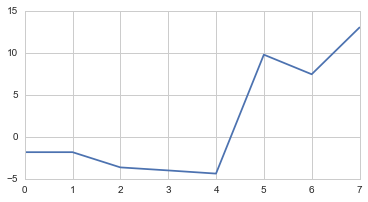

In [19]:
for gid in data.problem.unique():
    dat = filter(lambda d: d['probid']==gid, sdata)[0]
    print dat['choice']
    print dat['sampled_option']
    print dat['outcomes']
    print pref[gid].mean(axis=0)
    fig, ax = plt.subplots(figsize=(6,3))
    ax.plot(pref[gid].mean(axis=0))
    plt.show()

In [64]:
for i, row in pred.iterrows():
    pid = row['probid']
    print pid
    print row['choice']
    print pref[pid].mean(axis=0)

S1G1
0
[ -1.00000139  -2.00138864  -3.00139113  -4.00332875  -4.00332875
  -4.2604315   -4.74370137  -5.26519016  -5.68711449  -6.33656068
  -5.7373797   -6.02651711  -6.35535307  -6.80850643  -6.96138125
  -7.48657288  -7.78294357  -8.32407631  -8.71222332  -9.52156217
 -10.3109085  -11.14830601 -11.66950631 -12.16677739]
S1G4
0
[  1.00000289   2.00000289   2.00000289   3.00000578   4.00000867
   4.00000867   4.00000867   5.00001156   6.00001156   7.00001445
   8.00001734   9.00002023  10.00002023  11.00002312  11.19497017
  11.25403195  11.37284547  10.37145822  11.20305601  10.74604609]
S1G2
1
[-1.         -2.         -3.         -2.00597834 -3.00597834 -2.01228204
 -1.01858575 -0.26907066  0.19628063  0.68165434  1.67670471  2.32238109
  3.14613447  3.73172145  4.32932757]
S1G3
0
[  1.00000256   2.00257081   3.00257242   4.00465616   5.00465872
   6.0068995    7.00690206   8.00923093   9.00923254  10.01145608
  11.01145768  12.01353951  13.01354112  14.0155789   15.01558147
  16.01

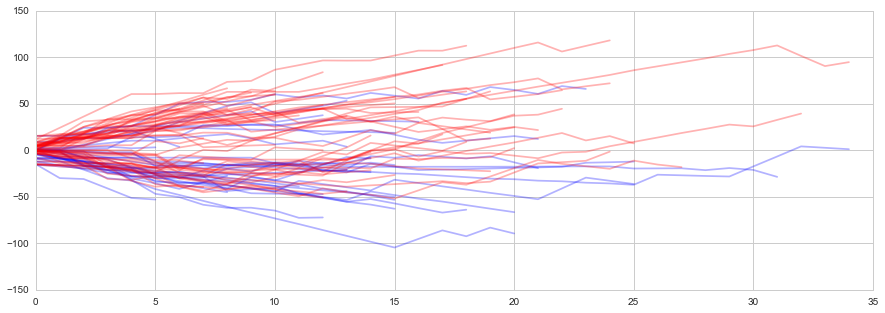

In [20]:
fig, ax = plt.subplots(figsize=(15,5))
for probid in pred[pred.choice==0].probid.values:
    ax.plot(pref[probid].mean(axis=0), color='blue', alpha=.3)
for probid in pred[pred.choice==1].probid.values:
    ax.plot(pref[probid].mean(axis=0), color='red', alpha=.3)

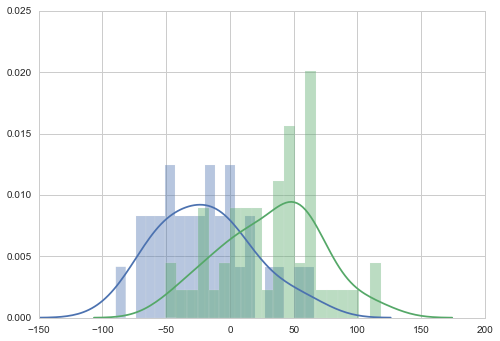

In [21]:
sns.distplot([pref[probid][:,-1].mean() for probid in pred[pred.choice==0].probid.values], 20)
sns.distplot([pref[probid][:,-1].mean() for probid in pred[pred.choice==1].probid.values], 20)
plt.show()

### CHASE (optional stopping)

In [ ]:
N_ITER = 1
SIM_ID = 'process_hertwig2004'
OUTDIR = 'process_fitresults_hertwig2004'

FIXED = {'minsamplesize': 2,
         'p_switch': .25}
PARSETS = [['theta', 'tau', 'p_stay', 'pow_gain', 'prelec_elevation', 'prelec_gamma']]

for parset in PARSETS:
    fitting = {p: PARS[p] for p in parset}
    m = CHASEProcessModel(problems=problems,
                          startdist='uniform')
    results = fit_mlh(m, problems, HBWE_data, 
                      SIM_ID, FIXED, fitting, ftol=.1, niter=N_ITER, outdir=OUTDIR)

In [428]:
results

,iteration,success,nllh,k,N,bic,p_stay,pow_gain,prelec_elevation,prelec_gamma,tau,theta
0,0,False,1305.835059,6,150,2641.73393,0.100995,0.561866,1.208618,1.073574,0.601972,2.784131


In [429]:
m = CHASEProcessModel(problems=problems,
                      startdist='uniform')
pred = {}
arr = []
for d in HBWE_data:
    pid = d['probid']
    pars = {'probid': d['probid'],
            'obs': d,
            'minsamplesize': 2,
            'p_fixed': 0,
            'tau': results.loc[0]['tau'],
            'theta': results.loc[0]['theta'],
            'p_stay': results.loc[0]['p_stay'],
            'prelec_gamma': results.loc[0]['prelec_gamma'],
            'prelec_elevation': results.loc[0]['prelec_elevation'],
            'pow_gain': results.loc[0]['pow_gain'],
            'max_T': 1000,
            'N': 10000}
    res = m(problems[pid], pars)
    arr.append([d['probid'], d['choice'], d['samplesize'], res['cp_B']])
    
df = pd.DataFrame(arr, columns=['probid', 'choice', 'samplesize', 'cp'])

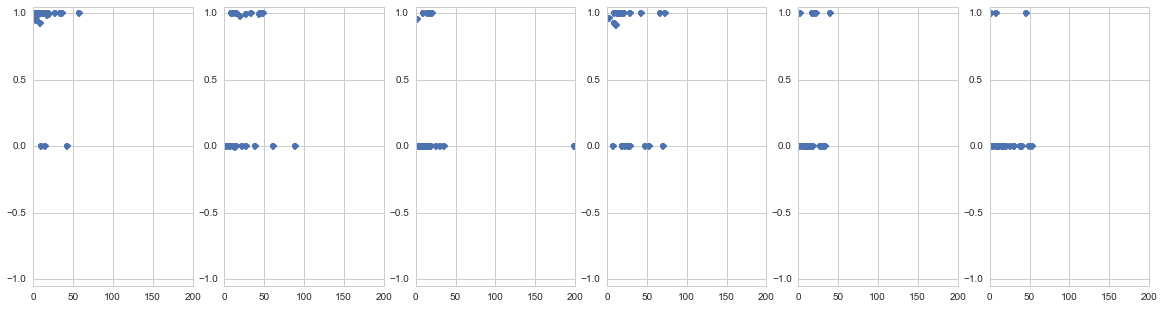

In [430]:
fig, ax = plt.subplots(1, 6, figsize=(20,5))

for pid in range(6):
    dfp = df[df.probid==pid]
    axi = ax[pid]
    axi.plot(dfp.samplesize, dfp.choice - dfp.cp, 'o')
    axi.set_ylim(-1.05, 1.05)
    axi.set_xlim(0,200)
plt.show()

In [432]:
pred = {}
m = CHASEProcessModel(problems=problems,
                      startdist='uniform')
for pid in problems:
    pars = {'probid': pid,
            'minsamplesize': 2,
            'p_switch': .25,
            'theta': results.loc[0]['theta'],
            'tau': results.loc[0]['tau'],
            'p_stay': results.loc[0]['p_stay'],
            'prelec_gamma': results.loc[0]['prelec_gamma'],
            'prelec_elevation': results.loc[0]['prelec_elevation'],
            'pow_gain': results.loc[0]['pow_gain'],
            'max_T': 1000,
            'N': 10000}
    pred[pid] = m(problems[pid], pars)

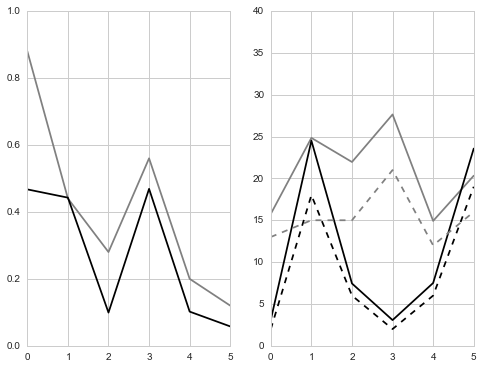

In [433]:
data = pd.read_csv('paper/data/hertwig2004_data.csv', index_col=0)

fig, axi = plt.subplots(1, 2, figsize=(8,6))
ax = axi[0]
ax.plot([data[data.problem==pid].choice.mean() for pid in problems], color='gray')
ax.plot([pred[pid]['p_resp'][1] for pid in problems], color='black')
ax.set_ylim(0,1)

ax = axi[1]
ax.plot([data[data.problem==pid].samplesize.mean() for pid in problems], '-', color='gray')
ax.plot([pred[pid]['samplesize'].mean() for pid in problems], '-', color='black')
ax.plot([np.median(data[data.problem==pid].samplesize.values) for pid in problems], '--', color='gray')
ax.plot([np.median(pred[pid]['samplesize']) for pid in problems], '--', color='black')
ax.set_ylim(0,40)

plt.show()

# Hau et al. (2008) - Experiment 1

In [ ]:
from mypy.explib.hau2008 import hau2008
HPKH1_data = hau2008.trial_data(study=1)

### Baseline

In [ ]:
from process_model_baseline import CHASEBaselineProcessModel

N_ITER = 1
SIM_ID = 'process_baseline_HPKH1'
OUTDIR = 'process_baseline_fitresults_HPKH1'
FIXED = {'minsamplesize': 2}
PARSETS = [['p_stop_geom']]

for parset in PARSETS:
    fitting = {p: PARS[p] for p in parset}
    m = CHASEBaselineProcessModel()
    results = fit_mlh(m, problems, HPKH1_data, 
                      SIM_ID, FIXED, fitting, niter=N_ITER, outdir=OUTDIR)

In [435]:
results

,iteration,success,nllh,k,N,bic,p_stop_geom
0,0,True,971.079115,1,230,1947.596308,0.07666


### Two-stage + geom

In [ ]:
from process_model_2stage import CHASETwoStageProcessModel
N_ITER = 1
SIM_ID = 'process_2stage_HPKH1'
OUTDIR = 'process_2stage_fitresults_HPKH1'
FIXED = {'minsamplesize': 2,
         'p_stop_geom': .07666}
PARSETS = [['pow_gain', 'prelec_elevation', 'prelec_gamma', 's']]

for parset in PARSETS:
    fitting = {p: PARS[p] for p in parset}
    m = CHASETwoStageProcessModel()
    results = fit_mlh(m, problems, HPKH1_data, 
                      SIM_ID, FIXED, fitting, niter=N_ITER, outdir=OUTDIR)

In [437]:
results

,iteration,success,nllh,k,N,bic,pow_gain,prelec_elevation,prelec_gamma,s
0,0,True,902.001973,4,230,1825.756263,0.318952,0.60701,0.65675,4.775384


In [438]:
pred = {}
m = CHASETwoStageProcessModel()
for pid in problems:
    pars = {'probid': pid,
            'minsamplesize': 2,
            'p_fixed': 1,
            'p_stop_geom': .07666,
            'pow_gain': results.loc[0]['pow_gain'],
            'prelec_gamma': results.loc[0]['prelec_gamma'],
            'prelec_elevation': results.loc[0]['prelec_elevation'],
            's': results.loc[0]['s'],
            'max_T': 1000,
            'N': 1000}
    pred[pid] = m(problems[pid], pars)

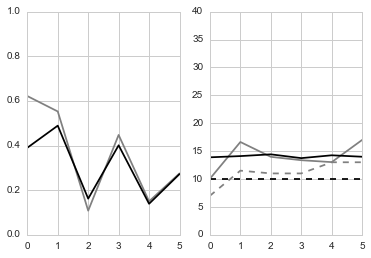

In [440]:
data = pd.read_csv('paper/data/hau_data.csv', index_col=0)
data = data[data.group==1]

fig, axi = plt.subplots(1, 2, figsize=(6,4))
ax = axi[0]
ax.plot([data[data.problem==pid].choice.mean() for pid in problems], color='gray')
ax.plot([pred[pid]['p_resp'][1] for pid in problems], color='black')
ax.set_ylim(0,1)

ax = axi[1]
ax.plot([data[data.problem==pid].samplesize.mean() for pid in problems], '-', color='gray')
ax.plot([pred[pid]['samplesize'].mean() for pid in problems], '-', color='black')
ax.plot([np.median(data[data.problem==pid].samplesize.values) for pid in problems], '--', color='gray')
ax.plot([np.median(pred[pid]['samplesize']) for pid in problems], '--', color='black')
ax.set_ylim(0,40)

plt.show()

### CHASE + geom

In [ ]:
N_ITER = 1
SIM_ID = 'process_HPKH1'
OUTDIR = 'process_fitresults_HPKH1'

FIXED = {'minsamplesize': 2,
         'p_fixed': 1,
         'p_switch': .185,
         'p_stop_geom': .07666}

PARSETS = [['tau', 'lambda', 'pow_gain', 'prelec_elevation', 'prelec_gamma']]

for parset in PARSETS:
    fitting = {p: PARS[p] for p in parset}
    m = CHASEProcessModel(problems=problems,
                          startdist='uniform-fixed')
    results = fit_mlh(m, problems, HPKH1_data, 
                      SIM_ID, FIXED, fitting, niter=N_ITER, outdir=OUTDIR)

In [464]:
results

,iteration,success,nllh,k,N,bic,lambda,pow_gain,prelec_elevation,prelec_gamma,tau
0,0,True,978.880092,5,230,1984.95058,0.000303,0.615612,1.175495,1.13464,0.540726


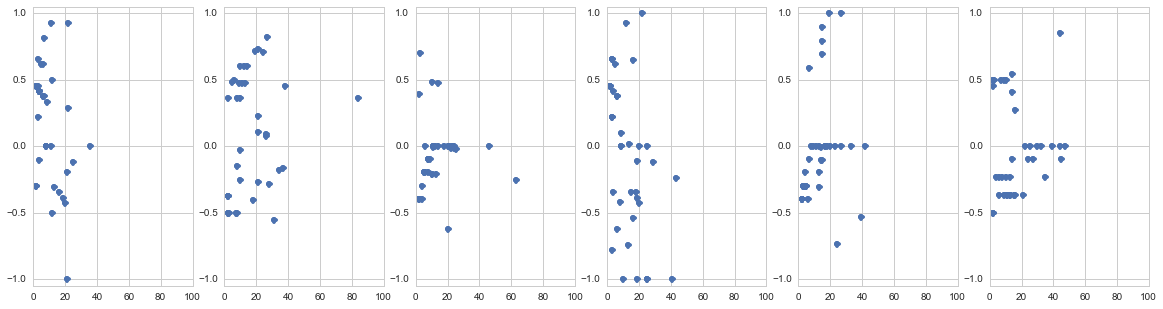

In [469]:
pred = {}
arr = []
for d in HPKH1_data:
    pid = d['probid']
    pars = {'probid': d['probid'],
            'obs': d,
            'minsamplesize': 2,
            'p_fixed': 1,
            'p_stop_geom': .07666,
            'tau': results.loc[0]['tau'],
            'lambda': results.loc[0]['lambda'],
            'prelec_gamma': results.loc[0]['prelec_gamma'],
            'prelec_elevation': results.loc[0]['prelec_elevation'],
            'pow_gain': results.loc[0]['pow_gain'],
            'max_T': 1000,
            'N': 10000}
    res = m(problems[pid], pars)
    arr.append([d['probid'], d['choice'], d['samplesize'], res['cp_B']])
    
df = pd.DataFrame(arr, columns=['probid', 'choice', 'samplesize', 'cp'])

fig, ax = plt.subplots(1, 6, figsize=(20,5))

for pid in range(6):
    dfp = df[df.probid==pid]
    axi = ax[pid]
    axi.plot(dfp.samplesize, dfp.choice - dfp.cp, 'o')
    axi.set_ylim(-1.05, 1.05)
    axi.set_xlim(0,100)
plt.show()

In [470]:
pred = {}
m = CHASEProcessModel(problems=problems,
                      startdist='uniform-fixed')
for pid in problems:
    pars = {'probid': pid,
            'minsamplesize': 2,
            'p_fixed': 1,
            'p_stop_geom': .07666,
            'p_switch': .185,
            'tau': results.loc[0]['tau'],
            'lambda': results.loc[0]['lambda'],
            'prelec_gamma': results.loc[0]['prelec_gamma'],
            'prelec_elevation': results.loc[0]['prelec_elevation'],
            'pow_gain': results.loc[0]['pow_gain'],
            'max_T': 1000,
            'N': 10000}
    pred[pid] = m(problems[pid], pars)

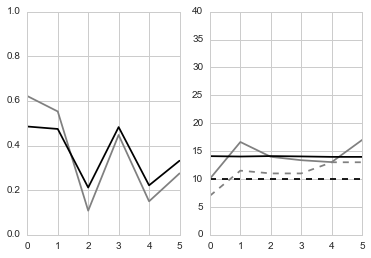

In [471]:
data = pd.read_csv('paper/data/hau_data.csv', index_col=0)
data = data[data.group==1]

fig, axi = plt.subplots(1, 2, figsize=(6,4))
ax = axi[0]
ax.plot([data[data.problem==pid].choice.mean() for pid in problems], color='gray')
ax.plot([pred[pid]['p_resp'][1] for pid in problems], color='black')
ax.set_ylim(0,1)

ax = axi[1]
ax.plot([data[data.problem==pid].samplesize.mean() for pid in problems], '-', color='gray')
ax.plot([pred[pid]['samplesize'].mean() for pid in problems], '-', color='black')
ax.plot([np.median(data[data.problem==pid].samplesize.values) for pid in problems], '--', color='gray')
ax.plot([np.median(pred[pid]['samplesize']) for pid in problems], '--', color='black')
ax.set_ylim(0,40)

plt.show()

### CHASE (optional)

In [446]:
N_ITER = 1
SIM_ID = 'process_HPKH1'
OUTDIR = 'process_fitresults_HPKH1'

FIXED = {'minsamplesize': 2,
         'p_switch': .185}
PARSETS = [['theta', 'tau', 'p_stay', 'pow_gain', 'prelec_elevation', 'prelec_gamma']]

for parset in PARSETS:
    fitting = {p: PARS[p] for p in parset}
    m = CHASEProcessModel(problems=problems,
                          startdist='uniform')
    results = fit_mlh(m, problems, HPKH1_data, 
                      SIM_ID, FIXED, fitting, ftol=.1, niter=N_ITER, outdir=OUTDIR)

p_stay	pow_gain	prelec_elevation	prelec_gamma	tau	theta
[ 0.1  1.   1.   1.   0.5  3. ] 2218.26060337 29.2593390942
[ 0.105  1.     1.     1.     0.5    3.   ] 2214.81868901 30.4063830376
[ 0.1   1.05  1.    1.    0.5   3.  ] 2225.2878659 31.8709230423
[ 0.1   1.    1.05  1.    0.5   3.  ] 2213.92925523 33.0243399143
[ 0.1   1.    1.    1.05  0.5   3.  ] 2212.7794734 32.9617190361
[ 0.1    1.     1.     1.     0.525  3.   ] 2196.50652517 31.0505108833
[ 0.1   1.    1.    1.    0.5   3.15] 2224.99277198 30.456193924
[ 0.102  0.95   1.017  1.017  0.508  3.05 ] 2207.18330184 30.4067790508
[ 0.102  0.983  1.022  1.022  0.511  2.867] 2191.41094463 30.4521679878
[ 0.103  0.975  1.033  1.033  0.517  2.725] 2149.34119405 27.1496319771
[ 0.103  0.975  1.033  1.033  0.517  2.925] 2205.91976808 26.9705290794
[ 0.098  0.967  1.044  1.044  0.522  2.9  ] 2174.99396264 28.9825470448
[ 0.102  0.956  0.993  1.059  0.53   2.867] 2149.09493142 28.6417989731
[ 0.103  0.933  0.964  1.089  0.544  2.8  ] 214

KeyboardInterrupt: 

In [ ]:
pred = {}
m = CHASEProcessModel(problems=problems,
                      startdist='uniform')
for pid in problems:
    pars = {'probid': pid,
            'minsamplesize': 2,
            'theta': results.loc[0]['theta'],
            'tau': results.loc[0]['tau'],
            'p_switch': .25,
            #'phi': results.loc[0]['phi'],
            'p_fixed': results.loc[0]['p_fixed'],
            'p_stop_geom': results.loc[0]['p_stop_geom'],
            #'prelec_gamma': results.loc[0]['prelec_gamma'],
            #'prelec_elevation': results.loc[0]['prelec_elevation'],
            'pow_gain': results.loc[0]['pow_gain'],
            'max_T': 1000,
            'N': 10000}
    pred[pid] = m(problems[pid], pars)

In [ ]:
data = pd.read_csv('paper/data/hau_data.csv', index_col=0)
data = data[data.group==1]

In [ ]:
fig, ax = plt.subplots()
ax.plot([data[data.problem==pid].choice.mean() for pid in problems])
ax.plot([pred[pid]['p_resp'][1] for pid in problems])
ax.set_ylim(0,1)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot([data[data.problem==pid].samplesize.mean() for pid in problems])
ax.plot([pred[pid]['samplesize'].mean() for pid in problems])
ax.set_ylim(0,40)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot([np.median(data[data.problem==pid].samplesize.values) for pid in problems])
ax.plot([np.median(pred[pid]['samplesize']) for pid in problems])
ax.set_ylim(0,40)
plt.show()

# Hau et al (2008) - Experiment 2

In [ ]:
HPKH2_data = hau2008.trial_data(study=2)

In [472]:
# confirm the right choice proportions and sample sizes
for pid in range(6):
    data = filter(lambda d: d['probid']==pid, HPKH2_data)
    print pid, np.round(np.mean([d['choice'] for d in data]), 2), np.median([d['samplesize'] for d in data])

0 0.56 27.0
1 0.51 38.0
2 0.36 27.0
3 0.36 35.0
4 0.36 34.0
5 0.46 33.0


In [ ]:
arr = []
for d in HPKH2_data:
    sampled_option = d['sampled_option']
    outcomes = d['outcomes']
    sum_L = np.sum(outcomes[sampled_option==0])
    sum_H = np.sum(outcomes[sampled_option==1])
    arr.append([d['probid'], sum_H - sum_L, d['choice']])
df = pd.DataFrame(arr, columns=['problem', 'diff', 'choice'])

sns.lmplot(x="diff", y="choice", data=df,
           logistic=True, y_jitter=.03)

sns.lmplot(x="diff", y="choice", data=df[(df['diff'] < 100) & (df['diff'] > -100)],
           logistic=True, y_jitter=.03)

### Baseline model

In [ ]:
from process_model_baseline import CHASEBaselineProcessModel
N_ITER = 1
SIM_ID = 'process_baseline_HPKH2'
OUTDIR = 'process_baseline_fitresults_HPKH2'
FIXED = {'minsamplesize': 2}
PARSETS = [['p_stop_geom', 'p_switch']]

for parset in PARSETS:
    fitting = {p: PARS[p] for p in parset}
    m = CHASEBaselineProcessModel()
    results = fit_mlh(m, problems, HPKH2_data, 
                      SIM_ID, FIXED, fitting, niter=N_ITER, outdir=OUTDIR)

In [474]:
results

,iteration,success,nllh,k,N,bic,p_stop_geom
0,0,True,1244.818071,1,234,2495.091464,0.02627


### Geom + two-stage

In [ ]:
from process_model_2stage import CHASETwoStageProcessModel

N_ITER = 1
SIM_ID = 'process_2stage_HPKH2'
OUTDIR = 'process_2stage_fitresults_HPKH2'

FIXED = {'minsamplesize': 2,
         'p_stop_geom': P_STOP_GEOM['HPKH2']}
PARSETS = [['pow_gain', 'prelec_elevation', 'prelec_gamma', 's']]

for parset in PARSETS:

    fitting = {p: PARS[p] for p in parset}
    m = CHASETwoStageProcessModel()
    results = fit_mlh(m, problems, HPKH2_data, 
                      SIM_ID, FIXED, fitting, niter=N_ITER, outdir=OUTDIR)

In [488]:
results

,iteration,success,nllh,k,N,bic,pow_gain,prelec_elevation,prelec_gamma,s
0,0,True,1222.658089,4,234,2467.137463,0.515943,0.719596,0.766813,1.699336


In [490]:
pred = {}
m = CHASETwoStageProcessModel()
for pid in problems:
    pars = {'probid': pid,
            'minsamplesize': 2,
            'p_fixed': 1,
            'p_stop_geom': P_STOP_GEOM['HPKH2'],
            'pow_gain': results.loc[0]['pow_gain'],
            'prelec_gamma': results.loc[0]['prelec_gamma'],
            'prelec_elevation': results.loc[0]['prelec_elevation'],
            's': results.loc[0]['s'],
            'max_T': 1000,
            'N': 1000}
    pred[pid] = m(problems[pid], pars)

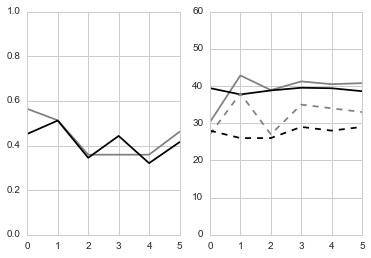

In [491]:
data = pd.read_csv('paper/data/hau_data.csv', index_col=0)
data = data[data.group==2]

fig, axi = plt.subplots(1, 2, figsize=(6,4))
ax = axi[0]
ax.plot([data[data.problem==pid].choice.mean() for pid in problems], color='gray')
ax.plot([pred[pid]['p_resp'][1] for pid in problems], color='black')
ax.set_ylim(0,1)

ax = axi[1]
ax.plot([data[data.problem==pid].samplesize.mean() for pid in problems], '-', color='gray')
ax.plot([pred[pid]['samplesize'].mean() for pid in problems], '-', color='black')
ax.plot([np.median(data[data.problem==pid].samplesize.values) for pid in problems], '--', color='gray')
ax.plot([np.median(pred[pid]['samplesize']) for pid in problems], '--', color='black')
ax.set_ylim(0,60)

plt.show()

In [ ]:
llh = {pid: 0 for pid in range(6)}
for i, row in df.iterrows():
    probid = row['probid']
    choice = row['choice']
    cp = row['cp']
    if choice == 0:
        llh[probid] += np.log(pfix(1 - cp))
    else:
        llh[probid] += np.log(pfix(cp))

In [ ]:
llh

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(20,5))

for pid in range(6):
    dfp = df[df.probid==pid]
    axi = ax[pid]
    axi.plot(dfp.samplesize, dfp.choice - dfp.cp, 'o')
    axi.set_ylim(-1.05, 1.05)
plt.show()

In [ ]:
data = pd.read_csv('paper/data/hau_data.csv', index_col=0)
data = data[data.group==2]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot([data[data.problem==pid].choice.mean() for pid in problems])
ax.plot(df.groupby('probid').apply(lambda d: d.cp.mean()).values)
ax.set_ylim(0,1)
plt.show()

### CHASE + geom

In [ ]:
N_ITER = 1
SIM_ID = 'process_HPKH2'
OUTDIR = 'process_fitresults_HPKH2'

FIXED = {'minsamplesize': 2,
         'p_fixed': 1,
         'p_stop_geom': P_STOP_GEOM['HPKH2']}

PARSETS = [['tau', 'lambda', 'pow_gain', 'prelec_elevation', 'prelec_gamma']]

for parset in PARSETS:
    fitting = {p: PARS[p] for p in parset}
    m = CHASEProcessModel(problems=problems,
                          startdist='uniform-fixed')
    results = fit_mlh(m, problems, HPKH2_data, 
                      SIM_ID, FIXED, fitting, niter=N_ITER, outdir=OUTDIR)

In [493]:
results

,iteration,success,nllh,k,N,bic,lambda,pow_gain,prelec_elevation,prelec_gamma,tau
0,0,True,1316.584042,5,234,2660.444689,0.000433,0.833131,1.167528,0.761687,0.655597


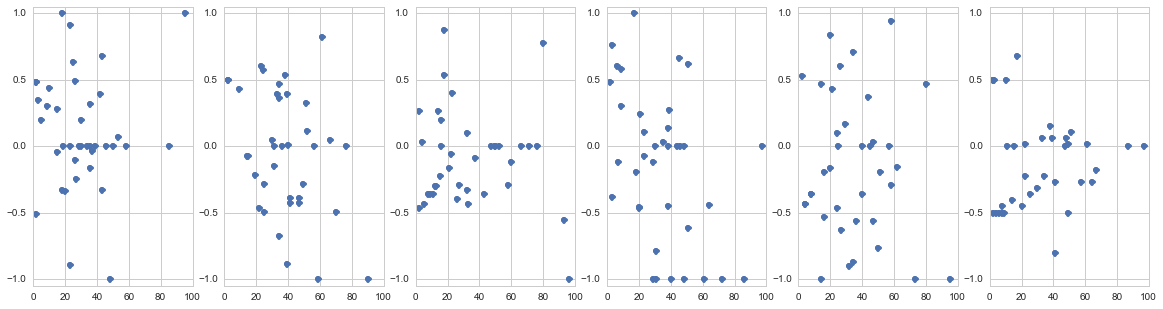

In [483]:
pred = {}
arr = []
for d in HPKH2_data:
    pid = d['probid']
    pars = {'probid': d['probid'],
            'obs': d,
            'minsamplesize': 2,
            'p_fixed': 1,
            'p_stop_geom': P_STOP_GEOM['HPKH2'],
            'tau': results.loc[0]['tau'],
            'lambda': results.loc[0]['lambda'],
            'prelec_gamma': results.loc[0]['prelec_gamma'],
            'prelec_elevation': results.loc[0]['prelec_elevation'],
            'pow_gain': results.loc[0]['pow_gain'],
            'max_T': 1000,
            'N': 10000}
    res = m(problems[pid], pars)
    arr.append([d['probid'], d['choice'], d['samplesize'], res['cp_B']])
    
df = pd.DataFrame(arr, columns=['probid', 'choice', 'samplesize', 'cp'])

fig, ax = plt.subplots(1, 6, figsize=(20,5))

for pid in range(6):
    dfp = df[df.probid==pid]
    axi = ax[pid]
    axi.plot(dfp.samplesize, dfp.choice - dfp.cp, 'o')
    axi.set_ylim(-1.05, 1.05)
    axi.set_xlim(0,100)
plt.show()

In [498]:
for pid in range(6):
    print pid
    print problems[pid]

0
[[[ 3.   1. ]
  [ 0.   0. ]]

 [[ 4.   0.8]
  [ 0.   0.2]]]
1
[[[ 3.    0.25]
  [ 0.    0.75]]

 [[ 4.    0.2 ]
  [ 0.    0.8 ]]]
2
[[[-32.    0.1]
  [  0.    0.9]]

 [[ -3.    1. ]
  [  0.    0. ]]]
3
[[[-4.   0.8]
  [ 0.   0.2]]

 [[-3.   1. ]
  [ 0.   0. ]]]
4
[[[  3.    1. ]
  [  0.    0. ]]

 [[ 32.    0.1]
  [  0.    0.9]]]
5
[[[  3.00000000e+00   2.50000000e-01]
  [  0.00000000e+00   7.50000000e-01]]

 [[  3.20000000e+01   2.50000000e-02]
  [  0.00000000e+00   9.75000000e-01]]]


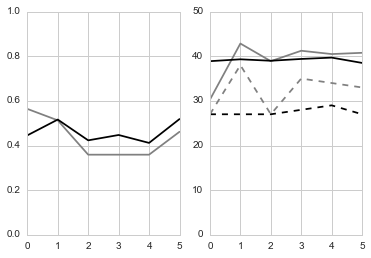

In [495]:
pred = {}
m = CHASEProcessModel(problems=problems,
                      startdist='uniform-fixed')
for pid in problems:
    pars = {'probid': pid,
            'minsamplesize': 2,
            'p_fixed': 1,
            'p_stop_geom': P_STOP_GEOM['HPKH2'],
            'p_switch': P_SWITCH['HPKH2'],
            'tau': results.loc[0]['tau'],
            'lambda': results.loc[0]['lambda'],
            'prelec_gamma': results.loc[0]['prelec_gamma'],
            'prelec_elevation': results.loc[0]['prelec_elevation'],
            'pow_gain': results.loc[0]['pow_gain'],
            'max_T': 1000,
            'N': 10000}
    pred[pid] = m(problems[pid], pars)
    
data = pd.read_csv('paper/data/hau_data.csv', index_col=0)
data = data[data.group==2]

fig, axi = plt.subplots(1, 2, figsize=(6,4))
ax = axi[0]
ax.plot([data[data.problem==pid].choice.mean() for pid in problems], color='gray')
ax.plot([pred[pid]['p_resp'][1] for pid in problems], color='black')
ax.set_ylim(0,1)

ax = axi[1]
ax.plot([data[data.problem==pid].samplesize.mean() for pid in problems], '-', color='gray')
ax.plot([pred[pid]['samplesize'].mean() for pid in problems], '-', color='black')
ax.plot([np.median(data[data.problem==pid].samplesize.values) for pid in problems], '--', color='gray')
ax.plot([np.median(pred[pid]['samplesize']) for pid in problems], '--', color='black')
ax.set_ylim(0,50)

plt.show()

In [ ]:
llh = {pid: 0 for pid in range(6)}
for i, row in df.iterrows():
    probid = row['probid']
    choice = row['choice']
    cp = row['cp']
    if choice == 0:
        llh[probid] += np.log(pfix(1 - cp))
    else:
        llh[probid] += np.log(pfix(cp))

In [ ]:
llh

In [ ]:
{0: -26.994788602372655,
 1: -22.985235037285271,
 2: -16.927245225174545,
 3: -27.251149138644049,
 4: -26.746905508212905,
 5: -19.132769547444727}

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(20,5))

for pid in range(6):
    dfp = df[df.probid==pid]
    axi = ax[pid]
    axi.plot(dfp.samplesize, dfp.choice - dfp.cp, 'o')
    axi.set_ylim(-1.05, 1.05)
plt.show()

In [ ]:
lm = sns.lmplot(x="samplesize", y="choice", row="probid",
                data=df, logistic=False, y_jitter=.03)
for ax in lm.axes.ravel():
    ax.set_ylim(-.05,1.05)
    ax.set_xlim(0,100)

In [ ]:
lm = sns.lmplot(x="cp", y="choice", row="probid",
                data=df, logistic=False, y_jitter=.03)
for ax in lm.axes.ravel():
    ax.set_ylim(-.05,1.05)
    ax.set_xlim(-.05,1.05)

### CHASE (optional stopping)

In [ ]:
N_ITER = 1
SIM_ID = 'process_HPKH2'
OUTDIR = 'process_fitresults_HPKH2'

FIXED = {'minsamplesize': 2,
         'p_switch': .1}

PARSETS = [#['theta', 'tau', 'pow_gain'],
           #['theta', 'tau', 'p_fixed', 'prelec_gamma', 'prelec_elevation'],
            ['theta', 'pow_gain', 'prelec_gamma', 'prelec_elevation']
           #['theta', 'tau', 'prelec_gamma', 'prelec_elevation', 'prelec_gamma_loss', 'prelec_elevation_loss', 'pow_gain']
          ]

for parset in PARSETS:
    fitting = {p: PARS[p] for p in parset}
    m = CHASEProcessModel(problems=problems,
                          startdist='indifferent')
    results = fit_mlh(m, problems, HPKH2_data, 
                      SIM_ID, FIXED, fitting, niter=N_ITER, outdir=OUTDIR)

In [ ]:
pred = {}
m = CHASEProcessModel(problems=problems,
                      startdist='uniform')
for pid in problems:
    pars = {'probid': pid,
            'minsamplesize': 2,
            'theta': results.loc[0]['theta'],
            'tau': results.loc[0]['tau'],
            'p_switch': .1,
            #'phi': results.loc[0]['phi'],
            #'p_fixed': results.loc[0]['p_fixed'],
            #'p_stop_geom': results.loc[0]['p_stop_geom'],
            #'prelec_gamma': results.loc[0]['prelec_gamma'],
            #'prelec_elevation': results.loc[0]['prelec_elevation'],
            'pow_gain': results.loc[0]['pow_gain'],
            'max_T': 1000,
            'N': 10000}
    pred[pid] = m(problems[pid], pars)
    
data = pd.read_csv('paper/data/hau_data.csv', index_col=0)
data = data[data.group==2]

In [ ]:
fig, ax = plt.subplots()
ax.plot([data[data.problem==pid].choice.mean() for pid in problems])
ax.plot([pred[pid]['p_resp'][1] for pid in problems])
ax.set_ylim(0,1)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot([data[data.problem==pid].samplesize.mean() for pid in problems])
ax.plot([pred[pid]['samplesize'].mean() for pid in problems])
ax.set_ylim(0,50)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot([np.median(data[data.problem==pid].samplesize.values) for pid in problems], color='gray')
ax.plot([np.median(pred[pid]['samplesize']) for pid in problems], color='black')
ax.set_ylim(0,40)
plt.show()

In [ ]:
pred[0]['samplesize']

In [ ]:
fig, axi = plt.subplots(2, 6, figsize=(15,8))

for pid in range(6):
    sns.distplot(data[data.problem==pid].samplesize.values, kde=False, ax=axi[1][pid])
    sns.distplot(pred[pid]['samplesize'], kde=False, ax=axi[0][pid], color='gray')
    
for i in range(2):
    for j in range(6):
        axi[i][j].set_xlim(0,200)

In [ ]:
# show the fitting results for the model with the lowest BIC
fitting = {p: PARS[p] for p in PARSETS[0]}
print best_result(SIM_ID, FIXED, fitting, outdir=OUTDIR)

m = CHASEModel(drift='cpt', startdist='indifferent')
pred = predict_from_result(m, problems, SIM_ID, FIXED, 
                           fitting = fitting, 
                           outdir=OUTDIR)

# Recovery

In [ ]:
from cogmod import cpt as cptmodel

def fit_chase(problems, data, fit_pars):
        
    FIXED = {'dt': .1}
    N_ITER = 1
    SIM_ID = 'recover_process_data'
    OUTDIR = 'chase_fitresults_recover_process_data'

    fitting = {p: PARS[p] for p in fit_pars}

    # initialize the model
    m = CHASEModel(drift='cpt',
                   startdist='indifferent',
                   problems=problems)

    # fit
    results = fit_mlh(m, problems, data, 
                      SIM_ID, FIXED, fitting, niter=N_ITER, outdir=OUTDIR, quiet=False)
    best = best_result(SIM_ID, FIXED, fitting, outdir=OUTDIR)
    pred = predict_from_result(m, problems, SIM_ID, FIXED, 
                               fitting = fitting, 
                               outdir=OUTDIR)

    return best, pred


PARS = {'theta': [1, 20],
        'c': [.01, 2, .5],
        'p_stay': [0, 1, .5],
        'tau': [0, 1, .5],
        'prelec_gamma': [0, 5, 1.],
        'prelec_elevation': [0, 5, 1.],
        'pow_gain': [0., np.inf, 1.],
        'w_loss': [0., np.inf, 1.],
        'lambda': [-2, 2, 0.],}

fitting_cpt = {'s': [0, np.inf, 1.],
               'prelec_gamma': [0, 10, 1.]}

def predicted_samplesize(pred):
    cp = pred['p_resp'][1]
    ss = pred['p_stop_cond'][:,1]*cp + pred['p_stop_cond'][:,0]*(1-cp)
    ss = ss/float(ss.sum())
    return np.array(ss)

def observed_samplesize(data):
    bc = np.bincount(data.samplesize)
    return bc/float(bc.sum())

def predicted_cp(pred):
    cp = pred['p_resp'][1]
    return cp

def observed_cp(data):
    return data.choice.mean()

In [ ]:
arr = np.genfromtxt('paper/data/six_problems.csv', delimiter=',')
problems = {i: arr[i].reshape((2,2,2)) for i in range(len(arr))}
#problems = {i: arr[i].reshape((2,2,2)) for i in range(1)}
#problems = [arr[i].reshape((2,2,2)) for i in range(len(arr))]

In [ ]:
with open('/Users/markant/code/chase/chase/paper/glockner_exp3_problems.pkl', 'r') as f:
    glockner_exp3_problems = pickle.load(f)

problems = {}
for p in glockner_exp3_problems:
    if np.sum(glockner_exp3_problems[p][:,:,0].ravel() < 0)==0:
        if np.random.random() < .05:
            problems[p] = glockner_exp3_problems[p]

In [ ]:
with open('/Users/markant/code/chase/chase/paper/data/tpt_problems.pkl', 'r') as f:
    problems = pickle.load(f)